In [1]:
#import necessary modules
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import time

In [2]:
import random
np.random.seed(21)

In [3]:
import tensorflow as tf 
tf.random.set_seed(2)

In [4]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer('roc_auc')
precision_scorer = get_scorer('precision')
recall_scorer=get_scorer('recall')
f1_scorer=get_scorer('f1')
accuracy_scorer = get_scorer('accuracy')

In [5]:
# loading the data from csv

In [6]:
data = pd.read_csv('diabetes.csv')

In [7]:
# checking the data

In [8]:
data.shape

(768, 9)

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [15]:
data[data['Pregnancies']==0]['Outcome'].count()

111

In [16]:
data[data['Glucose']==0]['Outcome'].count()

5

In [17]:
data[data['BloodPressure']==0]['Outcome'].count()

35

In [18]:
data[data['SkinThickness']==0]['Outcome'].count()

227

In [19]:
data[data['Insulin']==0]['Outcome'].count()

374

In [20]:
data[data['BMI']==0]['Outcome'].count()

11

In [21]:
data[data['DiabetesPedigreeFunction']==0]['Outcome'].count()

0

In [22]:
data[data['Age']==0]['Outcome'].count()

0

In [23]:
data.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

In [24]:
data.iloc[:,1:6] = data.iloc[:,1:6].replace(0, np.NaN)

In [25]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [26]:
# checking data distribution by histograms

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

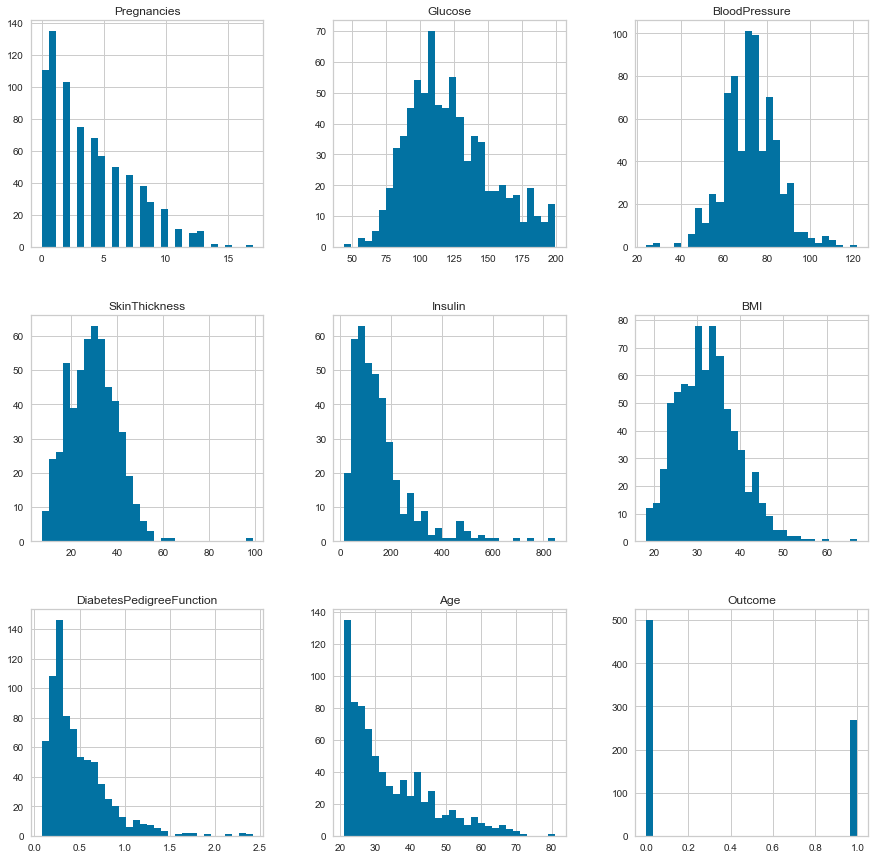

In [27]:
data.hist(bins=30,figsize = (15,15))

In [28]:
# separating target from other features, and splitting the data

In [29]:
y=data['Outcome'].values
X=data.drop(['Outcome'],axis=1).values

In [31]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8,stratify=y,shuffle=True)

In [33]:
X_train.shape

(537, 8)

In [34]:
X_test.shape

(231, 8)

In [35]:
y_train.shape

(537,)

In [36]:
y_test.shape

(231,)

In [38]:
# performing imputation

In [39]:
array_sum = np.sum(X_train)
array_has_nan = np.isnan(array_sum)
array_has_nan

True

In [40]:
imputer = SimpleImputer(missing_values = np.NAN, strategy = 'median')
imputer = imputer.fit(X_train[:,1:6])
X_train[:,1:6] = imputer.transform(X_train[:,1:6])
X_test[:,1:6]=imputer.transform(X_test[:,1:6])

In [41]:
array_sum = np.sum(X_train)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

In [45]:
# standardization

In [46]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [47]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# checking number of clusters using different metrics

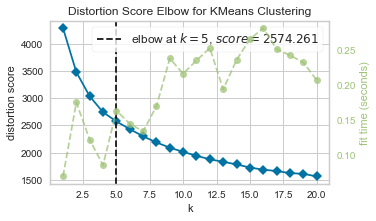

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
#distortion score
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))

visualizer.fit(X_train)        
visualizer.show()      

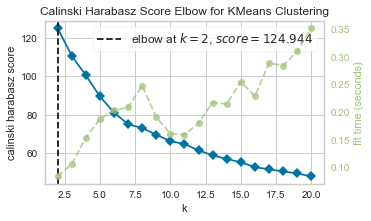

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [51]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)

visualizer.fit(X_train)        
visualizer.show() 

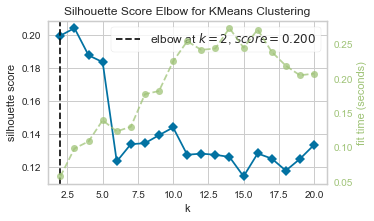

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [53]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)

visualizer.fit(X_train)        
visualizer.show() 

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [55]:
import matplotlib.cm as cm

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

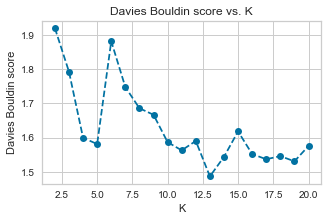

In [56]:
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center).fit(data)
    labels = kmeans.labels_
    #print(labels)
    score = davies_bouldin_score(data, labels)
    return score

centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_train, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')
    

In [574]:
model2=KMeans(n_clusters=2)
model2.fit(X_train)
label_x_train=model2.predict(X_train)

In [575]:
label_xtest= model2.predict(X_test)

In [585]:
label_x_train.shape

(537,)

In [586]:
def fowlkes_mallows_scorer(clusters,X,y):
    lst=[]
    for i in range(2,clusters+1):
        model = KMeans (n_clusters =i)
        model.fit(X)
        label = model.predict(X)
        lst.append(metrics.fowlkes_mallows_score(y,label))
    return lst

In [588]:
fowlkes_mallows_score_kmeans = fowlkes_mallows_scorer(20,X_train,y_train)

In [589]:
n_components = list(range(2,21))

Text(0, 0.5, 'Fowlkes-Mallows score')

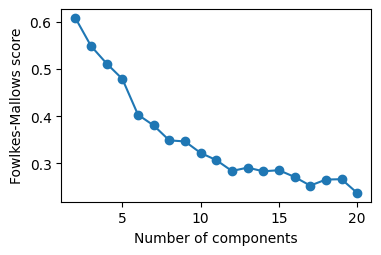

In [590]:
plt.figure(figsize=(4,2.5))
plt.plot(n_components,fowlkes_mallows_score_kmeans,'-o')
plt.xlabel('Number of components')
plt.ylabel('Fowlkes-Mallows score')

In [ ]:
#Combining original train data into a dataframe

In [599]:
new_data= np.concatenate((X_train, y_train_reshape), axis=1)

In [600]:
data_new = pd.DataFrame(new_data, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [601]:
data_new.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.098383  0.817536       0.472856      -0.008166 -0.186721  0.902263   
1     1.004070 -0.401681       0.639145       0.216706 -0.186721  0.513778   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.132307  2.869542      1.0  
1                  1.913220  0.847748      1.0

In [ ]:
# Combining original test data into a dataframe

In [602]:
y_test_reshape = y_test.reshape(231,1)

In [603]:
test_new=np.concatenate((X_test, y_test_reshape), axis=1)

In [604]:
data_test_new = pd.DataFrame(test_new, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [605]:
import seaborn as sns

In [ ]:
# Pair plot for original data

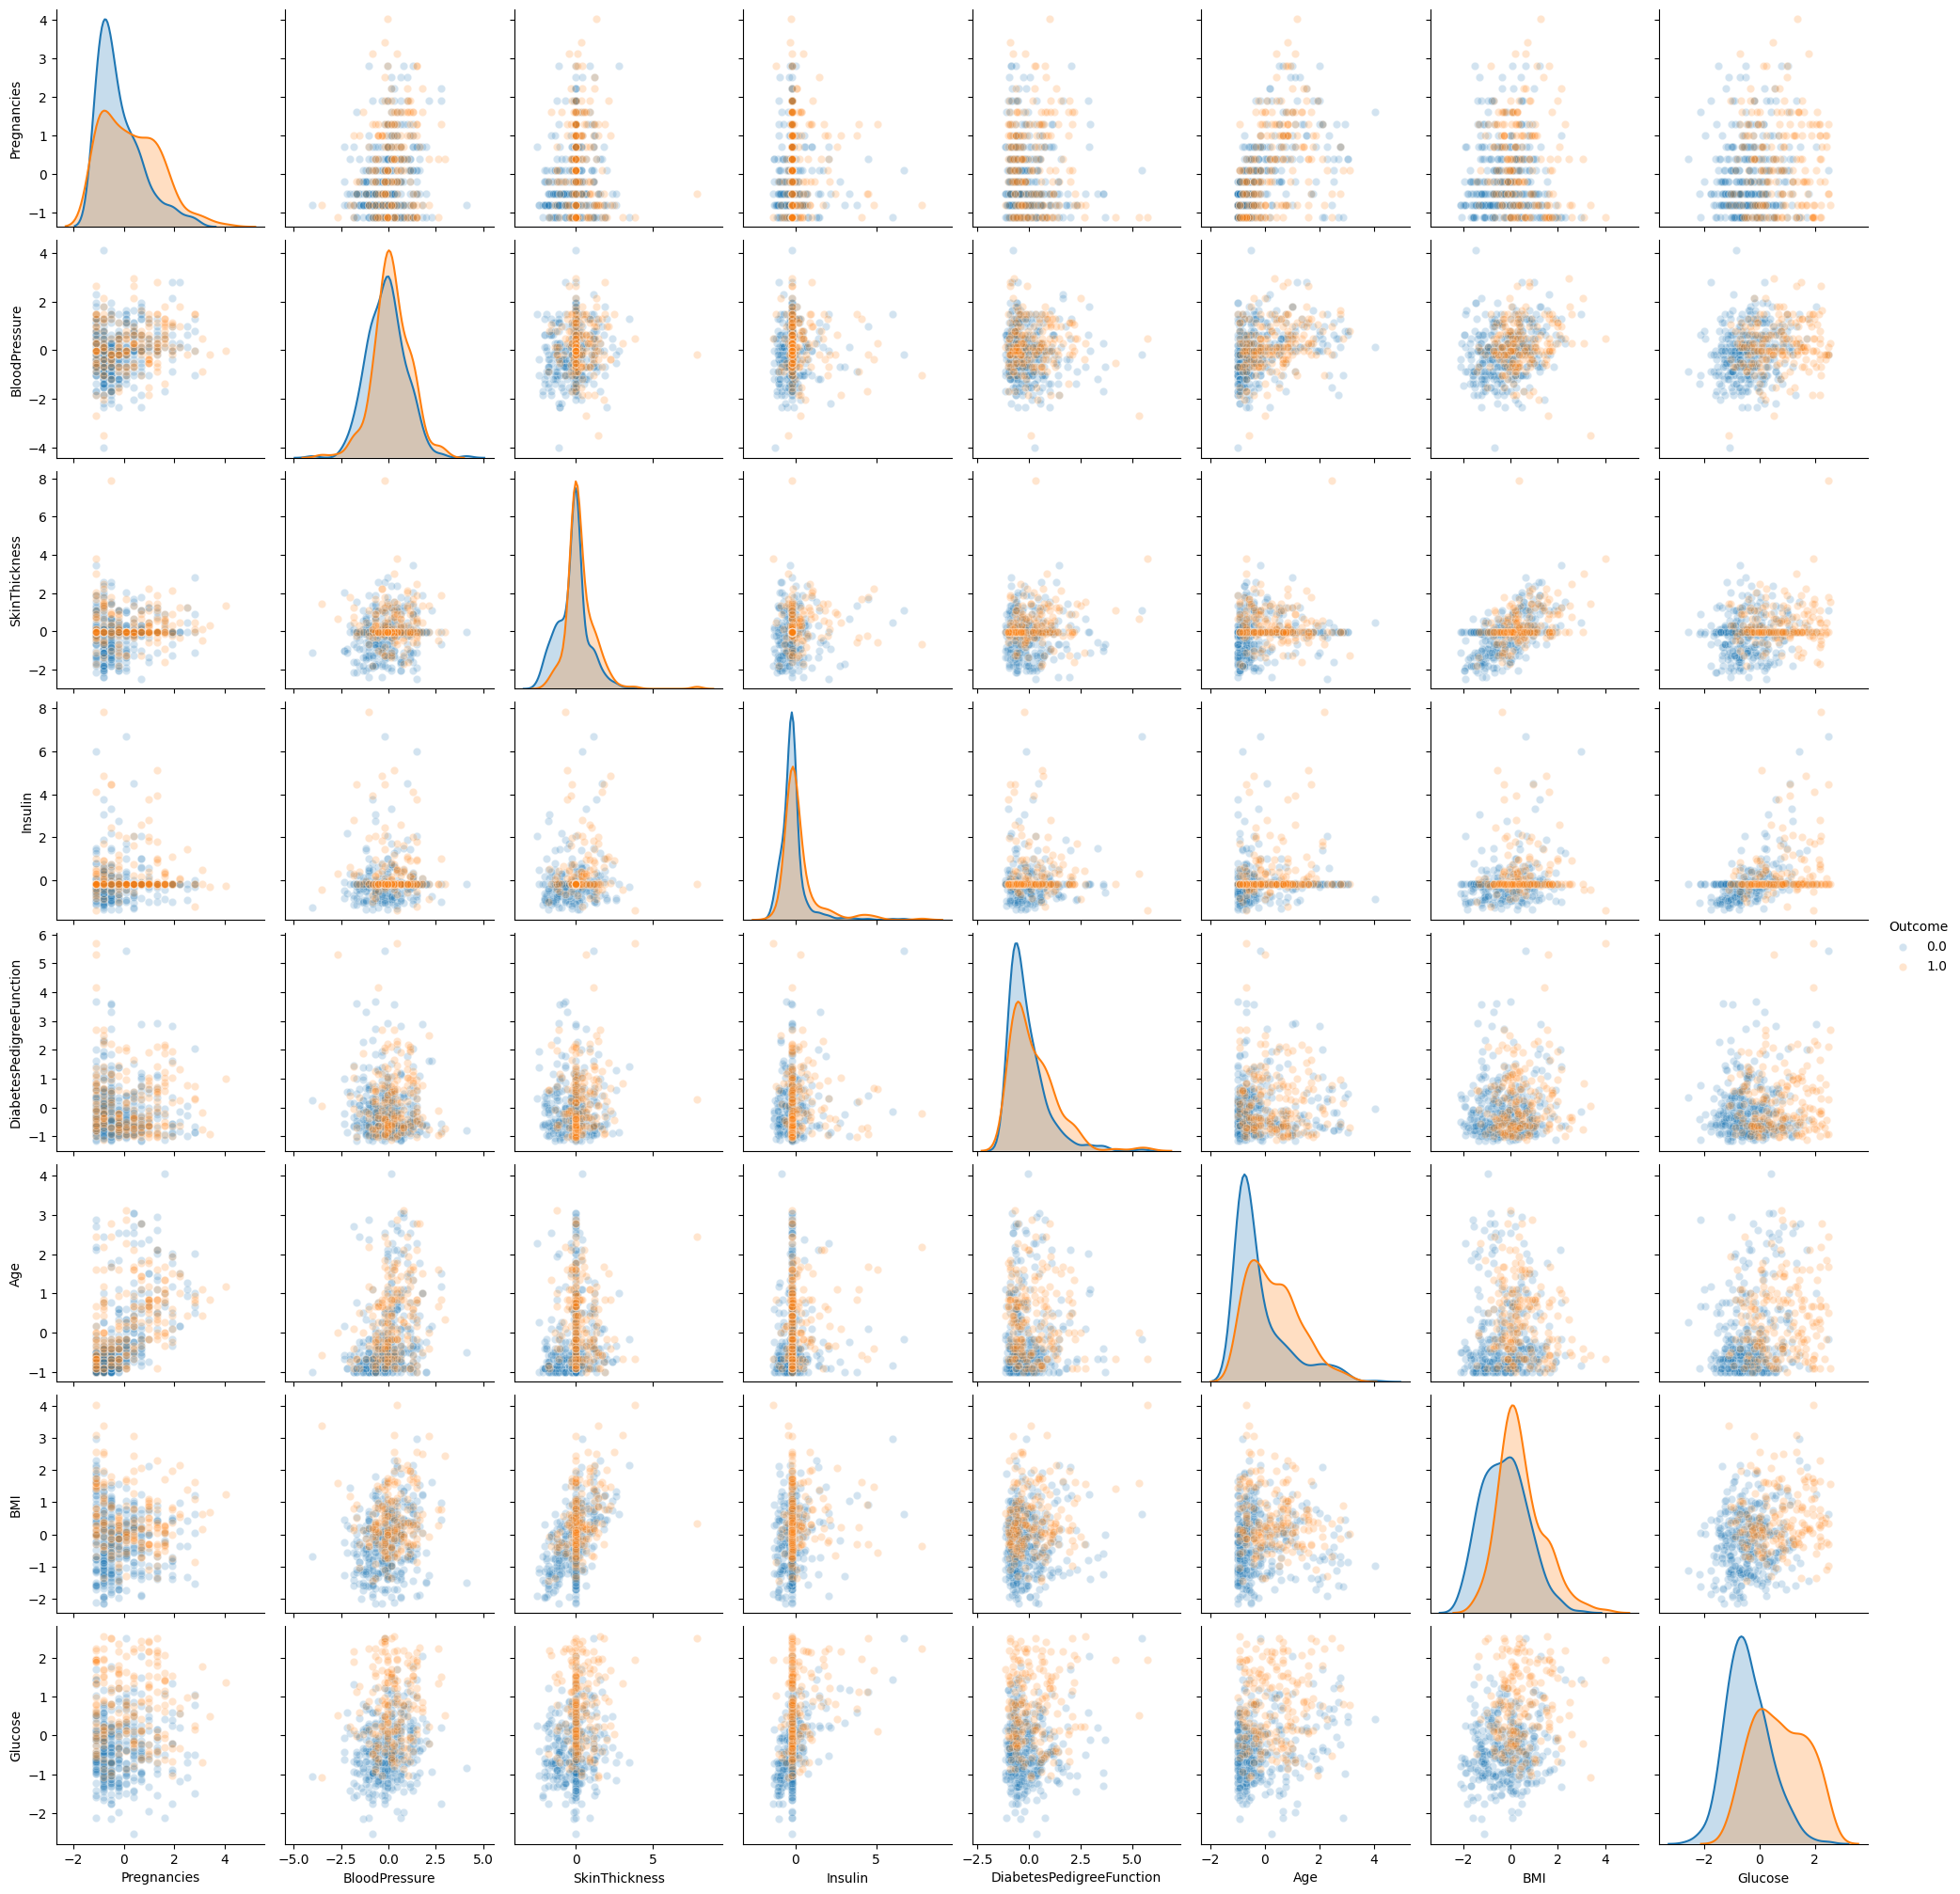

In [606]:
sns.pairplot(data_new, vars= ['Pregnancies',  'BloodPressure', 'SkinThickness', 'Insulin',
        'DiabetesPedigreeFunction', 'Age','BMI','Glucose' ], hue='Outcome',plot_kws={'alpha':0.2})

In [613]:
label_x_train1= label_x_train.reshape(537,1)

In [ ]:
#  Combining labels obtained from KMeans with original X_train 

In [615]:
new_X1= np.concatenate((X_train, label_x_train1), axis=1)

In [617]:
df_new = pd.DataFrame(new_X1, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [618]:
df_new.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.098383  0.817536       0.472856      -0.008166 -0.186721  0.902263   
1     1.004070 -0.401681       0.639145       0.216706 -0.186721  0.513778   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.132307  2.869542      1.0  
1                  1.913220  0.847748      1.0

In [89]:
labels5 = model2.labels_

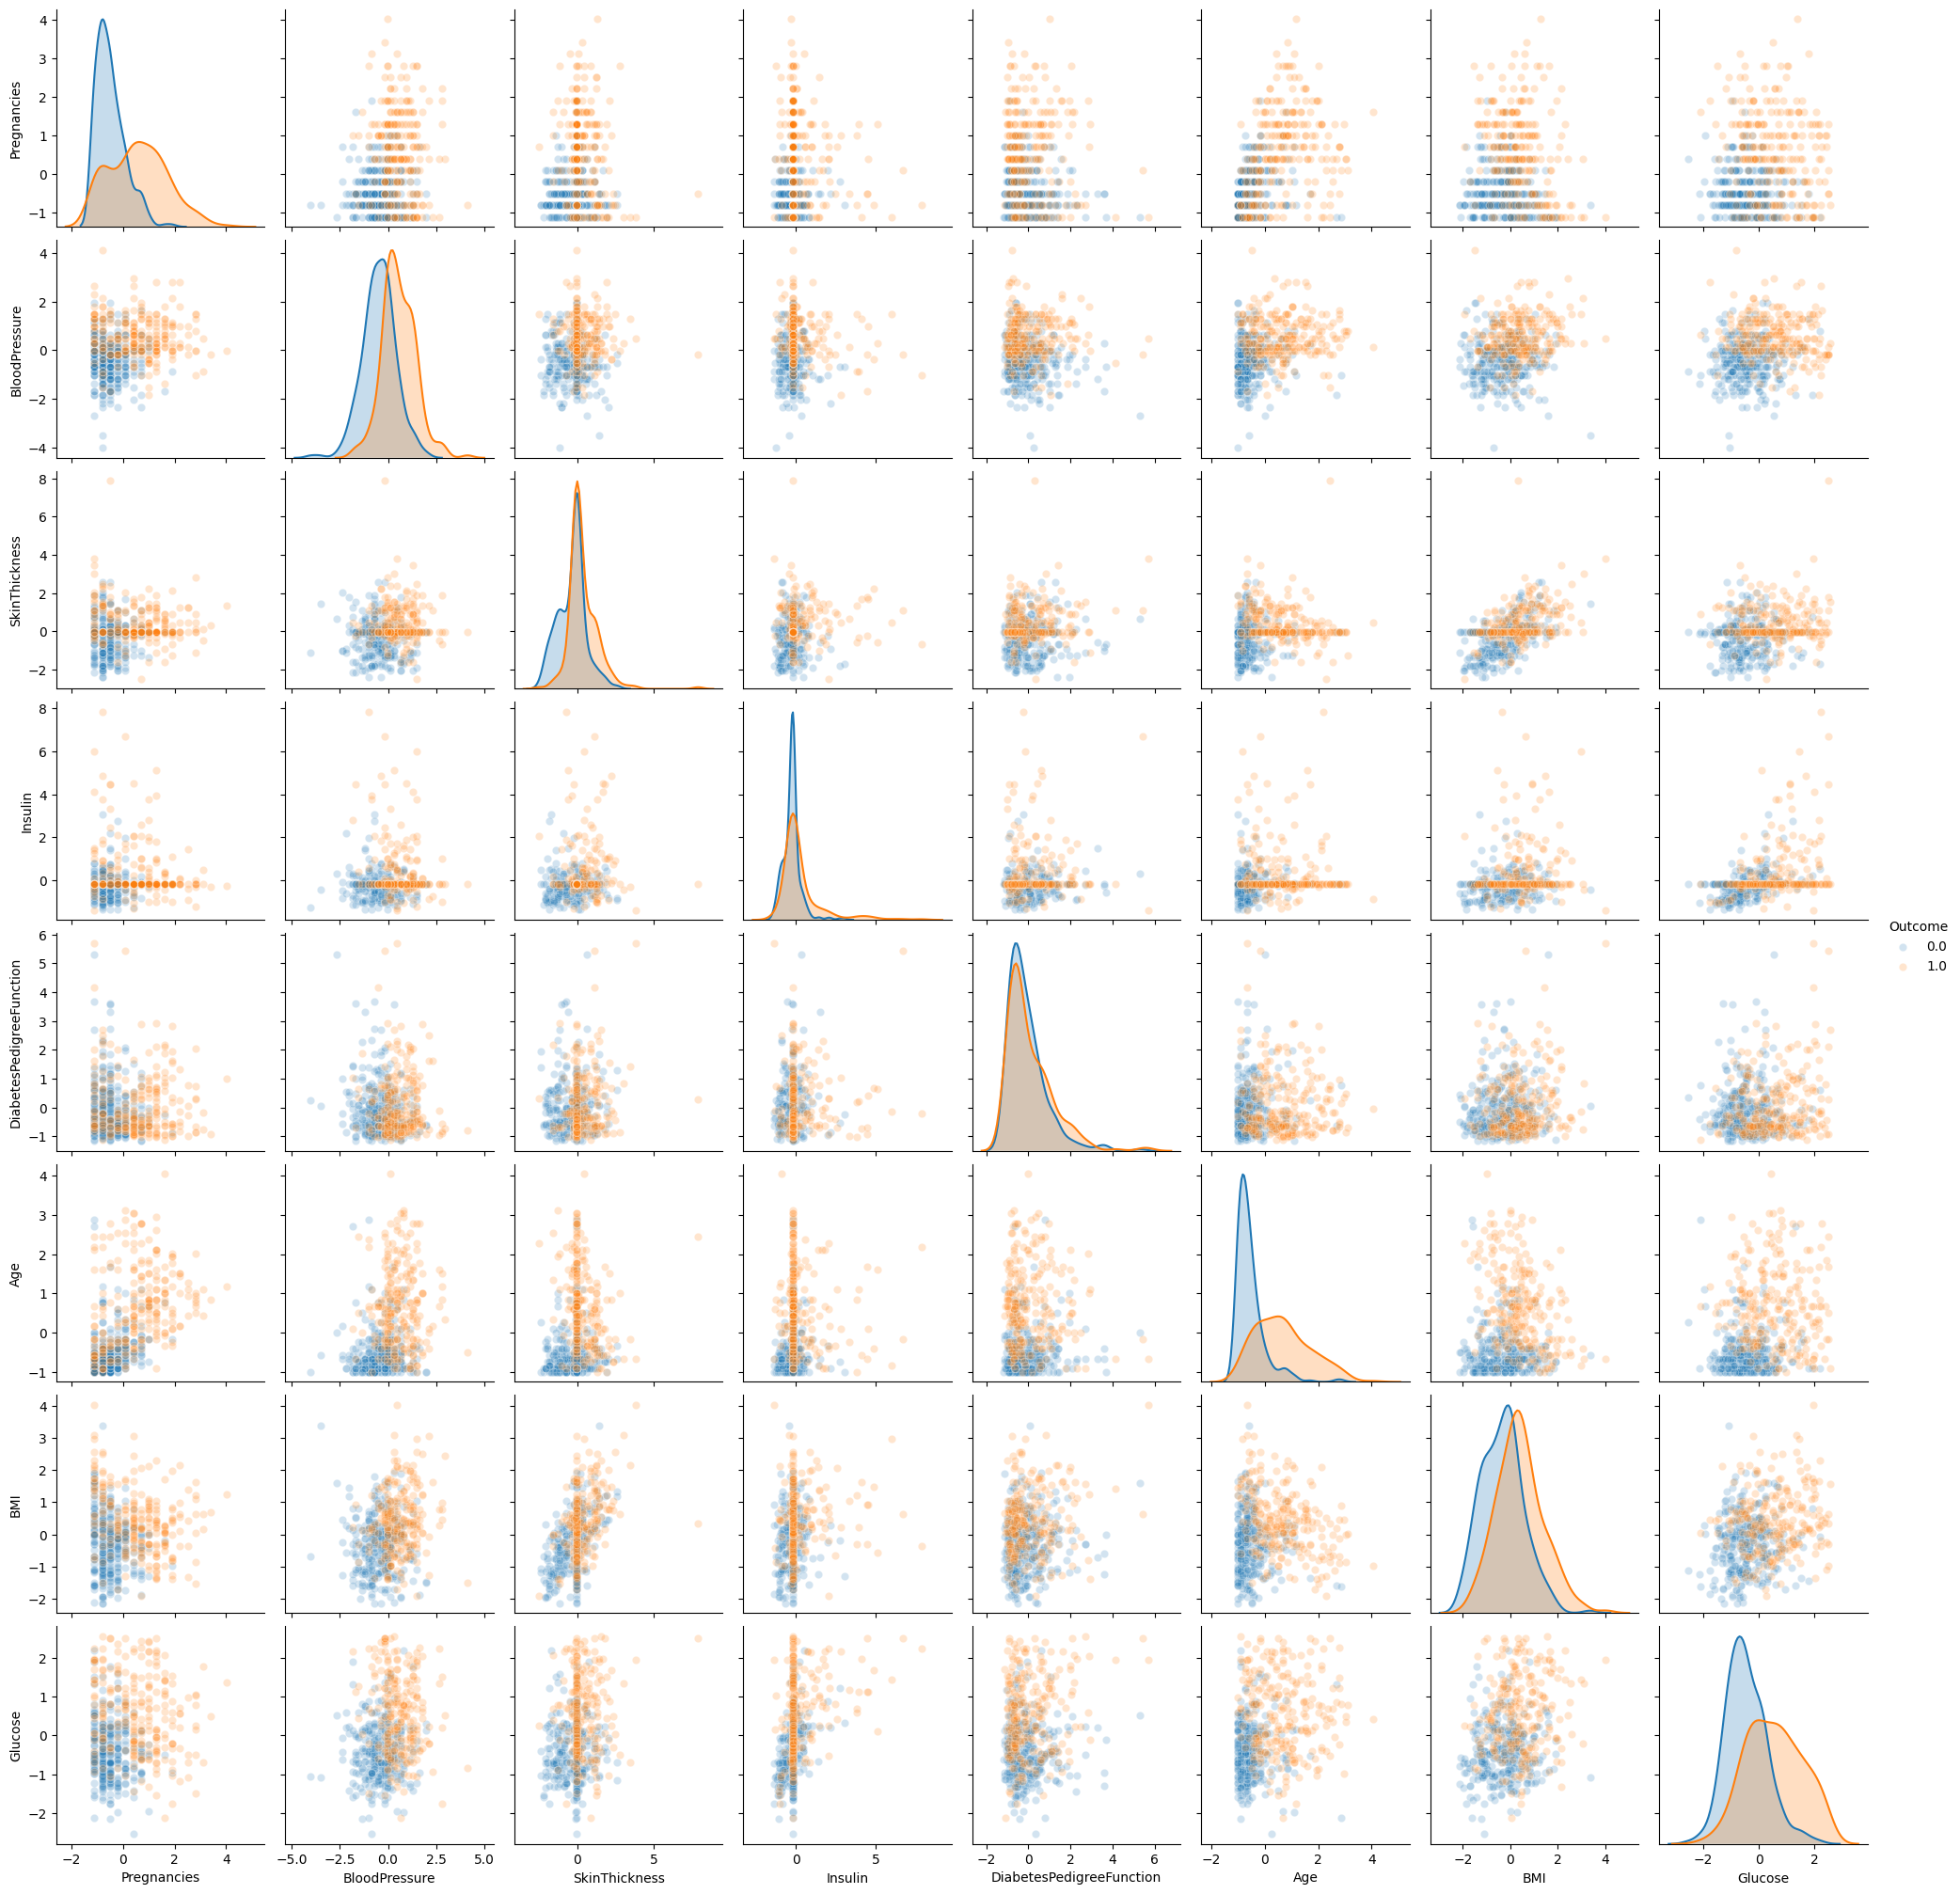

In [620]:
sns.pairplot(df_new, vars= ['Pregnancies',  'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age','BMI',  'Glucose'], hue='Outcome',plot_kws={'alpha':0.2})

In [621]:
# combining predicted X test labels with Xtest set

In [624]:
label_xtest = label_xtest.reshape(231,1)

In [625]:
label_xtest.shape

(231, 1)

In [626]:
new_testX1= np.concatenate((X_test, label_xtest), axis=1)
df_Xtest = pd.DataFrame(new_testX1, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [ ]:
# neural network on kmeans clustered data

In [848]:
# inspired by https://towardsdatascience.com/implementing-macro-f1-score-in-keras-what-not-to-do-e9f1aa04029d
#https://medium.com/@thongonary/how-to-compute-f1-score-for-each-epoch-in-keras-a1acd17715a2
# building f1 scorer for epochs
from keras.callbacks import Callback

class F1Callback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):   
        super().__init__()
        self.X_train = X_train 
        self.y_train = y_train   
        self.X_val = X_val  
        self.y_val = y_val
        self.val_f1s = []
        self.train_f1s = []
                    
    def on_train_begin(self, logs={}):        
        self.val_f1s = []
        self.train_f1s = []
     
    def on_epoch_end(self, epoch, logs={}):
        y_val_pred = np.asarray(self.model.predict(self.X_val)).round()      
        y_train_pred = np.asarray(self.model.predict(self.X_train)).round()
    
        val_f1 = f1_score(self.y_val, y_val_pred)
        train_f1 =  f1_score(self.y_train, y_train_pred)
       
        self.val_f1s.append(val_f1)
        self.train_f1s.append(train_f1)
        #print('epoch: ', len(self.val_f1s), ' val_f1:',val_f1, 'train_f1:', train_f1)

In [628]:
df_new.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.098383  0.817536       0.472856      -0.008166 -0.186721  0.902263   
1     1.004070 -0.401681       0.639145       0.216706 -0.186721  0.513778   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.132307  2.869542      1.0  
1                  1.913220  0.847748      1.0

In [629]:
X_means = df_new.values

In [631]:
X_means.shape

(537, 9)

In [632]:
df_Xtest.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -1.109200  2.531030      -0.524879       0.329141  1.497913  1.320631   
1     0.098383 -0.105114      -0.192301      -0.008166 -0.186721  1.798766   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.079496 -0.415873      1.0  
1                  1.258947 -0.584356      1.0

In [633]:
X_test_means = df_Xtest.values

In [634]:
X_test_means.shape

(231, 9)

In [970]:
X_train2, X_val, y_train2, y_val = train_test_split(
    X_means, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [971]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [972]:
def model_nn9():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(9, input_dim=9))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [973]:
batch_size=len(X_train)
estimator6 = KerasClassifier(build_fn=model_nn9, epochs=200, verbose=0, batch_size=batch_size )
history = estimator6.fit(X_train2, y_train2,callbacks=f1_callback, validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

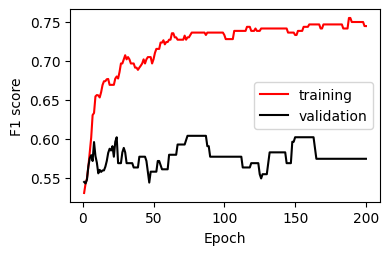

In [641]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

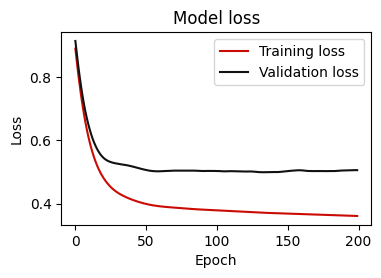

In [642]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [643]:
def model_nn10(hidden_layers=1, learning_rate=0.01, width=9):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=9))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [644]:
import logging
tf.get_logger().setLevel(logging.ERROR)

In [645]:
estimator1 = KerasClassifier(build_fn=model_nn10, epochs=24,  verbose=0, batch_size=len(X_means))
train_score, val_score = validation_curve(estimator1, X_means, y_train,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=0)

Text(0, 0.5, 'F1 score')

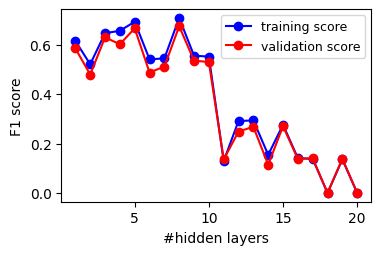

In [646]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [974]:
# checking for learning rate
estimator2 = KerasClassifier(build_fn=model_nn10, epochs=24,  verbose=0, batch_size=len(X_means),hidden_layers=5)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, X_means, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=0)

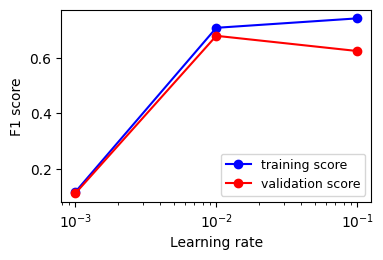

In [649]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [650]:
estimator3 = KerasClassifier(build_fn=model_nn10, epochs=24,  verbose=0, batch_size=len(X_means), hidden_layers=5, learning_rate=0.01)
widths = [3, 9, 18, 27, 36]
train_score_w, val_score_w = validation_curve(estimator3, X_means, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=0)


Text(0, 0.5, 'score')

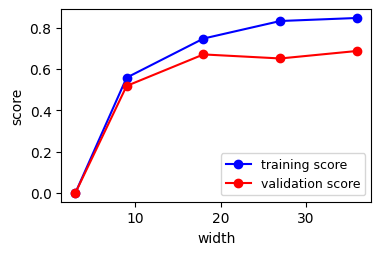

In [651]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [ ]:
# neural network model

In [652]:
train_sizes = [50,100,200,300,429]

In [653]:
estimator_kmeans_final = KerasClassifier(build_fn=model_nn10, epochs=24,  verbose=0, hidden_layers=5, width=18, learning_rate=0.01,batch_size=len(X_means))

In [654]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_kmeans_final, X_means, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [655]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.935039
100    0.901580
200    0.855286
300    0.788435
429    0.755155
dtype: float64

 --------------------
Mean validation scores

 50     0.603432
100    0.652298
200    0.638831
300    0.650883
429    0.672025
dtype: float64

 --------------------
Std training scores

 50     0.046521
100    0.054539
200    0.018070
300    0.031845
429    0.019443
dtype: float64

 --------------------
Std validation scores

 50     0.082238
100    0.071041
200    0.048870
300    0.081594
429    0.087194
dtype: float64


(0.4, 1.0)

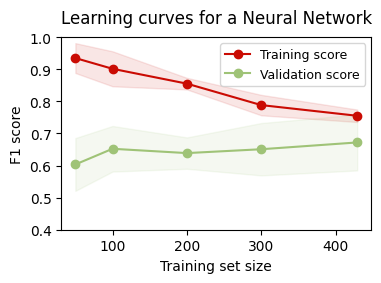

In [656]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [975]:
history = estimator_kmeans_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

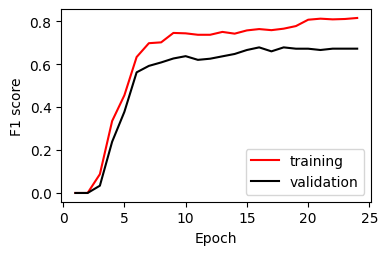

In [660]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,25))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

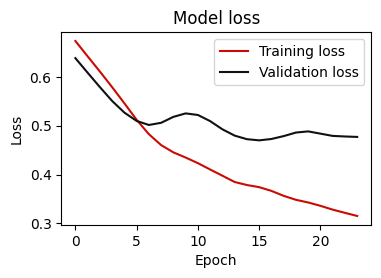

In [661]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [662]:
start = time.time()
estimator_kmeans_final.fit(X_means, y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.477380s


In [663]:
start = time.time()
y_pred_nn=estimator_kmeans_final.predict(X_test_means)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.086590s


Text(-4.277777777777779, 0.5, 'True label')

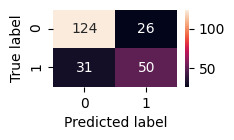

In [664]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred_nn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [665]:
precision_scorer(estimator_kmeans_final, X_test_means,y_test)

0.6578947368421053

In [666]:
recall_scorer(estimator_kmeans_final, X_test_means,y_test)

0.6172839506172839

In [667]:
f1_scorer(estimator_kmeans_final, X_test_means,y_test)

0.6369426751592356

In [668]:
accuracy_scorer(estimator_kmeans_final, X_test_means,y_test)

0.7532467532467533

In [669]:
roc_auc_scorer(estimator_kmeans_final, X_test_means,y_test)

0.7893004115226337

In [ ]:
# EM algorithm

In [92]:
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

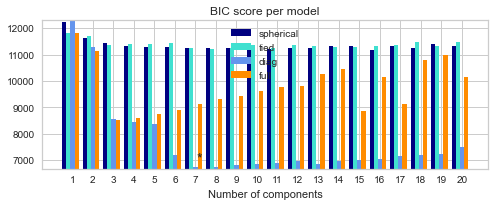

In [350]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_train)
        bic.append(gmm.bic(X_train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



In [862]:
gmm4=mixture.GaussianMixture(n_components=7, covariance_type='diag')

In [863]:
label_gmm4 = gmm4.fit_predict(X_train)

In [864]:
label_Xtest_gmm4 = gmm4.predict(X_test)

In [865]:
metrics.homogeneity_score(y_train,label_gmm4)

0.11715773173534853

In [866]:
metrics.completeness_score(y_train,label_gmm4)

0.042158091835995504

In [867]:
metrics.v_measure_score(y_train,label_gmm4)

0.06200446764264974

In [868]:
metrics.fowlkes_mallows_score(y_train,label_gmm4)

0.33643258996653685

In [869]:
metrics.adjusted_rand_score(y_train,label_gmm4)

0.021528172477156018

In [870]:
metrics.adjusted_mutual_info_score(y_train,label_gmm4)

0.05763830763923475

In [878]:
# combining the predicted X train labels with X_train data

In [879]:
label_gmm4_reshape= label_gmm4.reshape(537,1)

In [880]:
new_gmm4= np.concatenate((X_train, label_gmm4_reshape), axis=1)

In [881]:
df_gmm4 = pd.DataFrame(new_gmm4, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [882]:
import warnings
warnings.simplefilter("ignore", UserWarning)

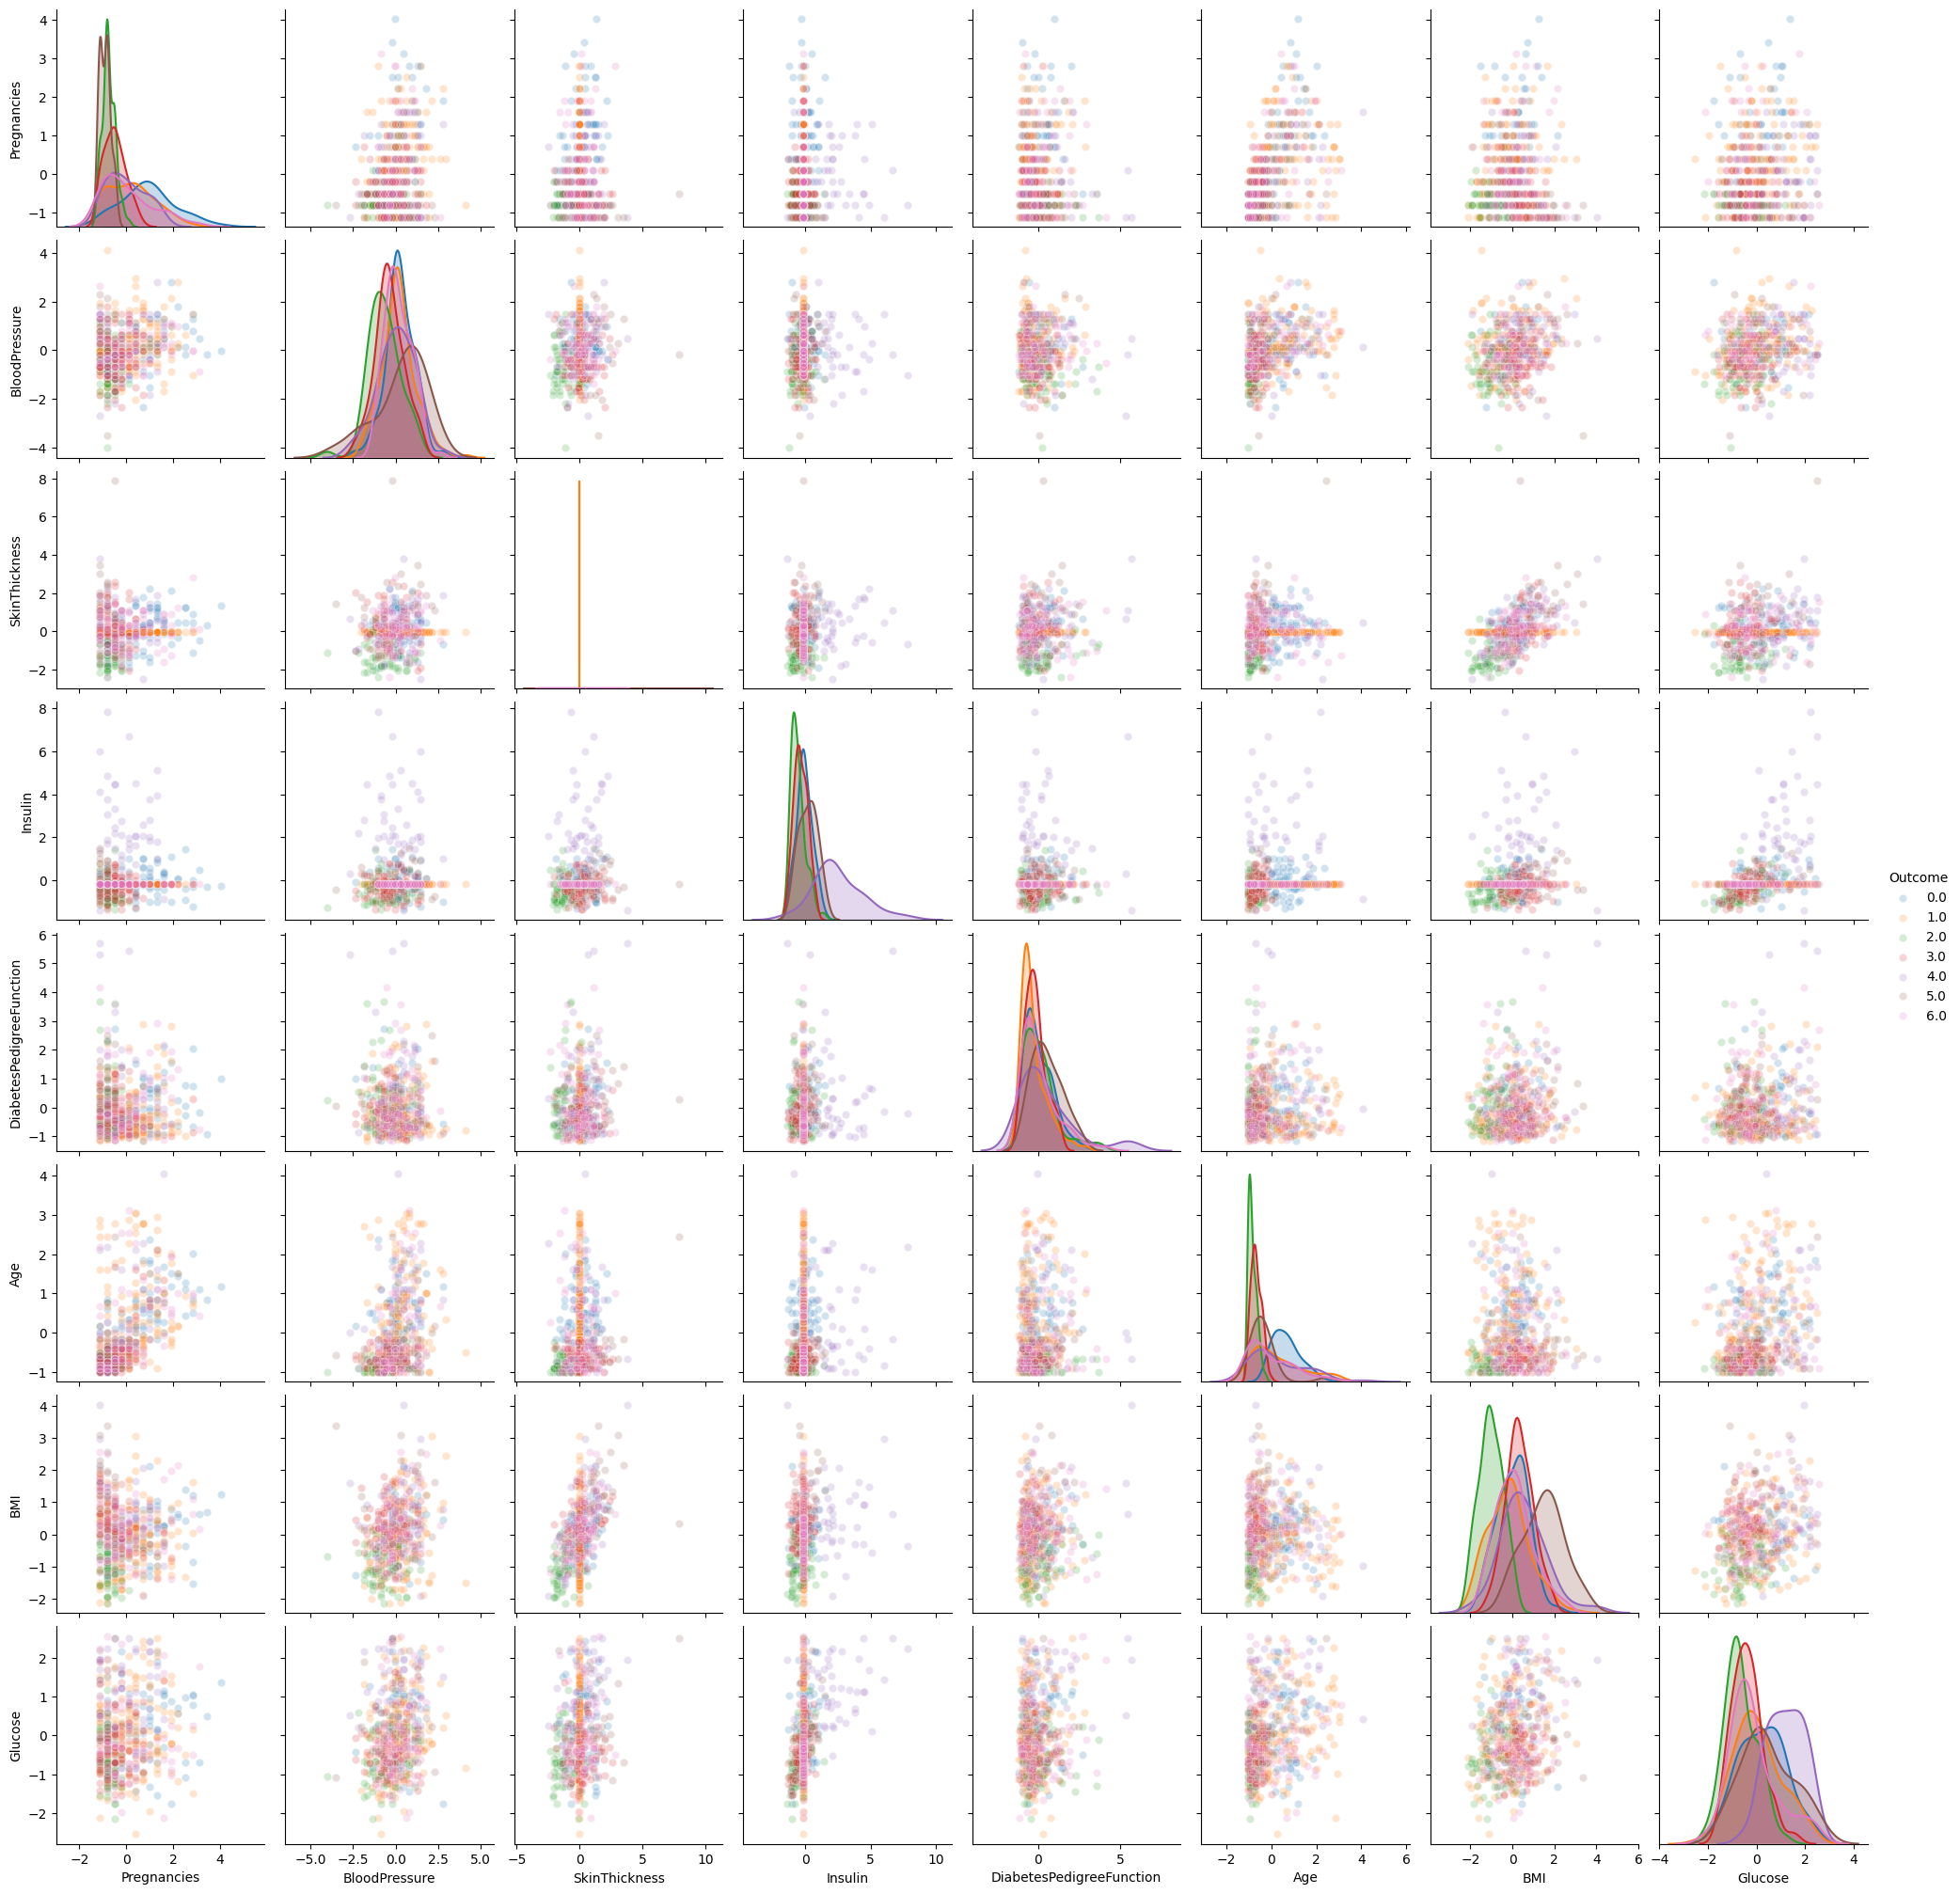

In [883]:
sns.pairplot(df_gmm4, vars= ['Pregnancies',  'BloodPressure', 'SkinThickness', 'Insulin',
        'DiabetesPedigreeFunction', 'Age', 'BMI','Glucose'], hue='Outcome', plot_kws={'alpha':0.2})

In [884]:
# combining the predicted X test labels with X_test data

In [885]:
label_Xtest_gmm4_reshape = label_Xtest_gmm4.reshape(231,1)
new_Xtest_gmm4= np.concatenate((X_test, label_Xtest_gmm4_reshape ), axis=1)
df_gmm4_Xtest = pd.DataFrame(new_Xtest_gmm4, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [886]:
df_gmm4.shape

(537, 9)

In [887]:
df_gmm4_values = df_gmm4.values

In [888]:
df_gmm4_Xtest.shape

(231, 9)

In [889]:
df_gmm4_Xtest_values = df_gmm4_Xtest.values

In [ ]:
# neural network for EM

In [890]:
X_train2, X_val, y_train2, y_val = train_test_split(
    df_gmm4_values, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [891]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [892]:
def model_nn11():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(9, input_dim=9))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [893]:
batch_size=len(X_train)
estimator6 = KerasClassifier(build_fn=model_nn11, epochs=200, verbose=0, batch_size=batch_size )
history = estimator6.fit(X_train2, y_train2,callbacks=f1_callback, validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

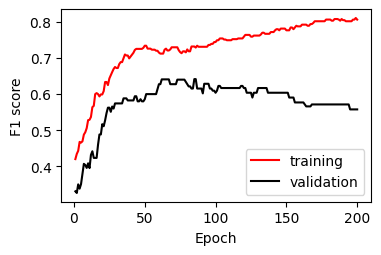

In [894]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

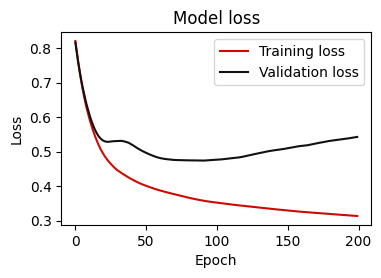

In [895]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [896]:
def model_nn12(hidden_layers=1, learning_rate=0.01, width=9):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=9))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [897]:
estimator1 = KerasClassifier(build_fn=model_nn12, epochs=75,  verbose=0, batch_size=len(df_gmm4_values))
train_score, val_score = validation_curve(estimator1, df_gmm4_values, y_train,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=0)

Text(0, 0.5, 'F1 score')

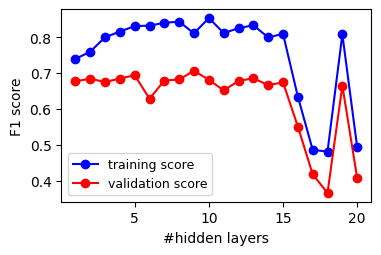

In [898]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [901]:
# checking for learning rate
estimator2 = KerasClassifier(build_fn=model_nn12, epochs=75,  verbose=0, batch_size=len(df_gmm4_values),hidden_layers=2)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2,df_gmm4_values, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=0)

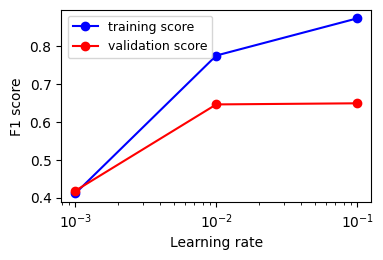

In [902]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [903]:
estimator3 = KerasClassifier(build_fn=model_nn12, epochs=75,  verbose=0, batch_size=len(df_gmm4_values), hidden_layers=2, learning_rate=0.01)
widths = [3, 9, 18, 27, 36]
train_score_w, val_score_w = validation_curve(estimator3, df_gmm4_values, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=0)


Text(0, 0.5, 'score')

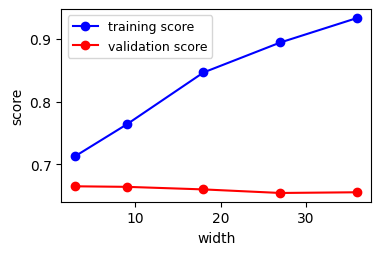

In [904]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [905]:
estimator_gmm_final = KerasClassifier(build_fn=model_nn12, epochs=75,  verbose=0, hidden_layers=2, width=3, learning_rate=0.01,batch_size=len(df_gmm4_values))

In [906]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_gmm_final, df_gmm4_values, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [907]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.421546
100    0.652023
200    0.731717
300    0.579443
429    0.678491
dtype: float64

 --------------------
Mean validation scores

 50     0.363533
100    0.495485
200    0.663229
300    0.509556
429    0.633562
dtype: float64

 --------------------
Std training scores

 50     0.286289
100    0.208409
200    0.033078
300    0.261465
429    0.022902
dtype: float64

 --------------------
Std validation scores

 50     0.221817
100    0.167414
200    0.057285
300    0.256283
429    0.021079
dtype: float64


(0.0, 1.0)

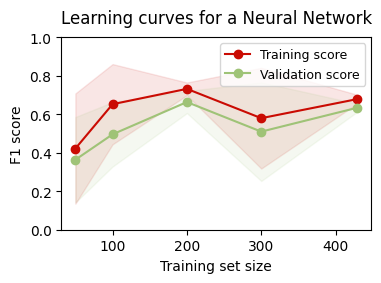

In [908]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0,1)

In [909]:
history = estimator_gmm_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

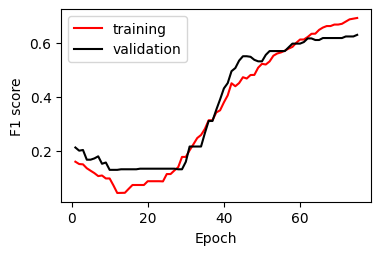

In [911]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,76))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

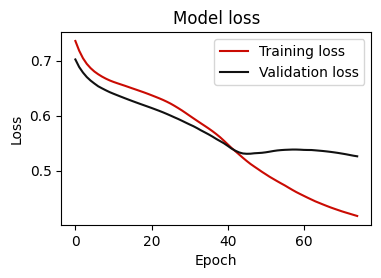

In [912]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [913]:
start = time.time()
estimator_gmm_final.fit(df_gmm4_values,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.412822s


In [914]:
start = time.time()
y_pred_nn=estimator_gmm_final.predict(df_gmm4_Xtest_values)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.067526s


Text(-4.277777777777779, 0.5, 'True label')

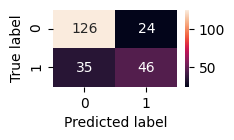

In [915]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred_nn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [916]:
precision_scorer(estimator_gmm_final,df_gmm4_Xtest_values,y_test)

0.6571428571428571

In [917]:
recall_scorer(estimator_gmm_final,df_gmm4_Xtest_values,y_test)

0.5679012345679012

In [918]:
f1_scorer(estimator_gmm_final,df_gmm4_Xtest_values,y_test)

0.6092715231788078

In [919]:
accuracy_scorer(estimator_gmm_final,df_gmm4_Xtest_values,y_test)

0.7445887445887446

In [920]:
roc_auc_scorer(estimator_gmm_final,df_gmm4_Xtest_values,y_test)

0.7857201646090535

In [ ]:
# PCA

(0.0, 8.0)

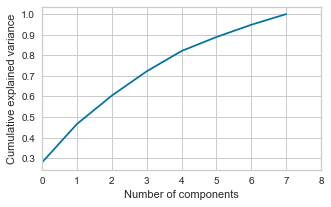

In [114]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
plt.figure(figsize=(5,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xlim(0,8,1)

Text(0, 0.5, 'Variance')

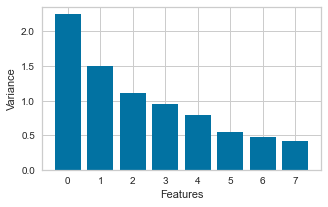

In [115]:
pca=PCA().fit(X_train)
features=range(pca.n_components_)
plt.figure(figsize=(5,3))
plt.bar(features, pca.explained_variance_)
plt.xlabel('Features')
plt.ylabel('Variance')

In [119]:
reshape_y_train= y_train.reshape(537,1)

In [125]:
from yellowbrick.features import PCA as yPCA

In [129]:
X_train.shape

(537, 8)

In [130]:
from yellowbrick.text import TSNEVisualizer

In [132]:
from sklearn.manifold import TSNE

In [138]:
pca2=PCA(n_components=5)
X_pca2=pca2.fit_transform(X_train)
X_pca2.shape

(537, 5)

In [368]:
X_test_pca=pca2.transform(X_test)

In [139]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_pca_results2 = tsne.fit_transform(X_pca2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 4.54169487953186 seconds


In [140]:
df_pca3= np.concatenate((tsne_pca_results2, reshape_y_train), axis=1)

In [141]:
df_pca3 = pd.DataFrame(df_pca3, columns = ['tsne_pc1', 'tsne_pc2', 'Outcome'])

<AxesSubplot:xlabel='tsne_pc1', ylabel='tsne_pc2'>

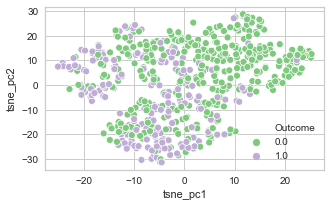

In [142]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_pc1", y="tsne_pc2",
    hue="Outcome",
    palette='Accent',
    data=df_pca3
)

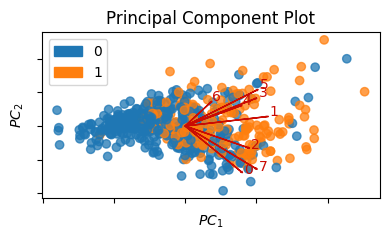

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [922]:
plt.figure(figsize=(4,2.5))
visualizer = yPCA(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train, y_train)
visualizer.show()

In [143]:
df_pca4= np.concatenate((X_pca2, reshape_y_train), axis=1)

In [144]:
df_pca4 = pd.DataFrame(df_pca4, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
         'Outcome'])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

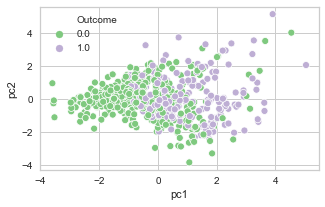

In [145]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="Outcome",
    palette='Accent',
    data=df_pca4
)

In [ ]:
# applying clustering on PCA data

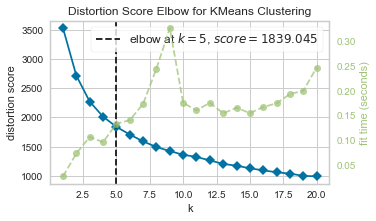

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [147]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_pca2)        
visualizer.show()  

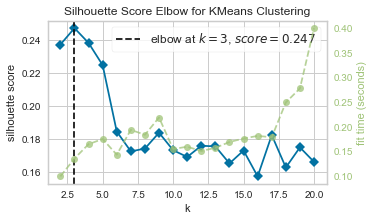

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [148]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_pca2)        
visualizer.show() 

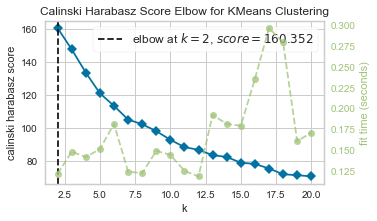

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [149]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_pca2)        
visualizer.show() 

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

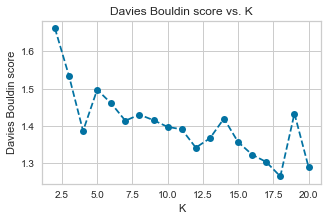

In [150]:
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center).fit(data)
    labels = kmeans.labels_
    #print(labels)
    score = davies_bouldin_score(data, labels)
    return score

centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_pca2, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')
    

In [151]:
model_clus2=KMeans(n_clusters=2)
model_clus2.fit(X_pca2)
label_x_train_clus2=model_clus2.predict(X_pca2)

In [152]:
metrics.homogeneity_score(y_train,label_x_train_clus2)

0.13445519231979391

In [153]:
metrics.completeness_score(y_train,label_x_train_clus2)

0.1264058072566479

In [154]:
metrics.fowlkes_mallows_score(y_train,label_x_train_clus2)

0.6085986592969663

In [155]:
metrics.v_measure_score(y_train,label_x_train_clus2)

0.13030630989398603

In [156]:
metrics.adjusted_rand_score(y_train,label_x_train_clus2)

0.17645711129081273

In [157]:
metrics.adjusted_mutual_info_score(y_train,label_x_train_clus2)

0.1290864862750223

In [158]:
label_x_train_clus2= label_x_train_clus2.reshape(537,1)
kmeans_clu2= np.concatenate((X_pca2, label_x_train_clus2), axis=1)
df_clu2 = pd.DataFrame(kmeans_clu2, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
        'Outcome'])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

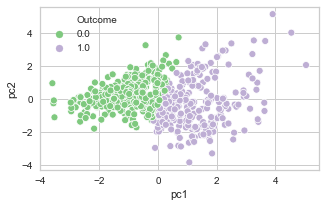

In [159]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="Outcome",
    palette='Accent',
    data=df_clu2
)

In [160]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_pca_results = tsne.fit_transform(X_pca2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 5.062201023101807 seconds


In [161]:
df_clu2_pca2 = np.concatenate((tsne_pca_results, label_x_train_clus2), axis=1)
df_clu2_pca2 = pd.DataFrame(df_clu2_pca2, columns = ['tsne_pc1', 'tsne_pc2', 'Outcome'])

<AxesSubplot:xlabel='tsne_pc1', ylabel='tsne_pc2'>

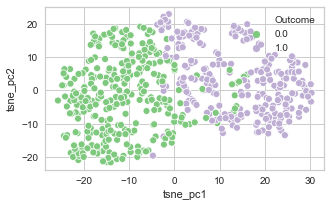

In [162]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_pc1", y="tsne_pc2",
    hue="Outcome",
    palette='Accent',
    data=df_clu2_pca2
)

In [ ]:
# running EM on PCA data

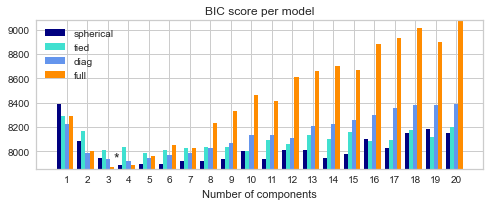

In [175]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_pca2)
        bic.append(gmm.bic(X_pca2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [176]:
gmm_clus3=mixture.GaussianMixture(n_components=3, covariance_type='full')
label_gmm_clus3 = gmm_clus3.fit_predict(X_pca2)

In [177]:
metrics.homogeneity_score(y_train,label_gmm_clus3)

0.08549440228281766

In [178]:
metrics.completeness_score(y_train,label_gmm_clus3)

0.05236197888413704

In [179]:
metrics.fowlkes_mallows_score(y_train,label_gmm_clus3)

0.4900188859005942

In [180]:
metrics.v_measure_score(y_train,label_gmm_clus3)

0.06494666477024724

In [181]:
metrics.adjusted_rand_score(y_train,label_gmm_clus3)

0.08246542504485828

In [182]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_clus3)

0.06288578681479864

In [183]:
label_gmm_clus3= label_gmm_clus3.reshape(537,1)
gmm_c2= np.concatenate((X_pca2, label_gmm_clus3), axis=1)
df_gmm_c2 = pd.DataFrame(gmm_c2, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
        'Outcome'])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

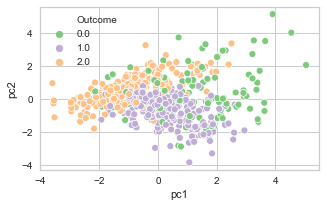

In [184]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="Outcome",
    palette='Accent',
    data=df_gmm_c2
)

In [193]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_pca_results = tsne.fit_transform(X_pca2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 5.408477067947388 seconds


In [194]:
df_gmm3_pca2= np.concatenate((tsne_pca_results, label_gmm_clus3), axis=1)
df_gmm3_pca2 = pd.DataFrame(df_gmm3_pca2, columns = ['tsne_pc1', 'tsne_pc2', 'Outcome'])

<AxesSubplot:xlabel='tsne_pc1', ylabel='tsne_pc2'>

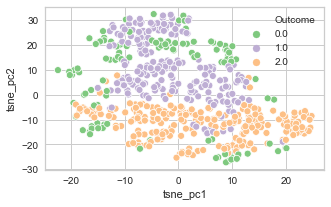

In [195]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_pc1", y="tsne_pc2",
    hue="Outcome",
    palette='Accent',
    data=df_gmm3_pca2
)

In [ ]:
# checking neural network on pca transformed data

In [312]:
# making the df first
pca_data= np.concatenate((X_pca2, reshape_y_train), axis=1)
pca_df = pd.DataFrame(pca_data, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
        'Outcome'])

In [323]:
X_pca2.shape

(537, 5)

In [324]:
reshape_y_train.shape

(537, 1)

In [329]:
y_train.shape

(537,)

In [940]:
X_train2, X_val, y_train2, y_val = train_test_split(
    X_pca2, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [941]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [942]:
def model_nn1():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(5, input_dim=5))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [943]:
batch_size=len(X_train)
estimator6 = KerasClassifier(build_fn=model_nn1, epochs=200, verbose=0, batch_size=batch_size )
history = estimator6.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

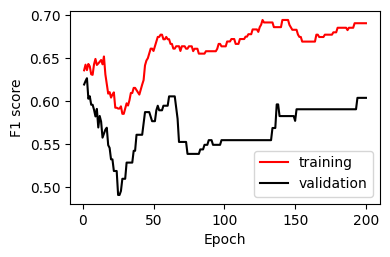

In [333]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

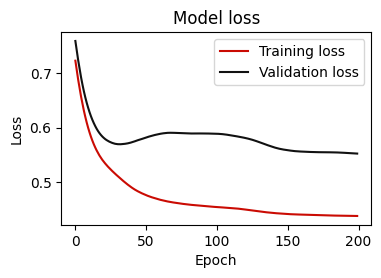

In [334]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [945]:
def model_nn2(hidden_layers=1, learning_rate=0.01, width=5):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=5))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [947]:
estimator1 = KerasClassifier(build_fn=model_nn2, epochs=45,  verbose=0, batch_size=len(X_pca2))
train_score, val_score = validation_curve(estimator1, X_pca2, y_train,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=0)

Text(0, 0.5, 'F1 score')

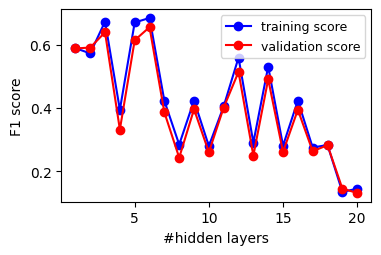

In [340]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [ ]:
#chose 3 hidden layers

In [948]:
# checking for learning rate
estimator2 = KerasClassifier(build_fn=model_nn2, epochs=45,  verbose=0, batch_size=len(X_pca2),hidden_layers=3)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, X_pca2, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=0)

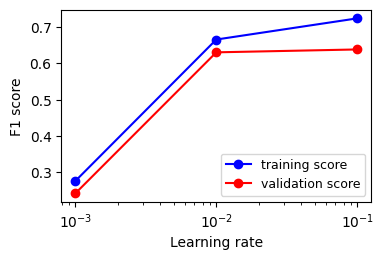

In [345]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [949]:
estimator3 = KerasClassifier(build_fn=model_nn2, epochs=45,  verbose=0, batch_size=len(X_pca2), hidden_layers=3, learning_rate=0.01)
widths = [2, 5,10,25,50]
train_score_w, val_score_w = validation_curve(estimator3, X_pca2, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=0)


Text(0, 0.5, 'score')

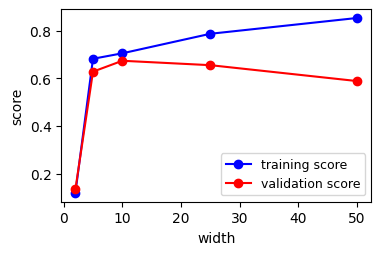

In [350]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [351]:
train_sizes = [50,100,200,300,429]

In [ ]:
# checking performance of the final model

In [352]:
estimator_pca_final = KerasClassifier(build_fn=model_nn2, epochs=45,  verbose=0, hidden_layers=3, width=10, learning_rate=0.01,batch_size=len(X_pca2))

In [354]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_pca_final, X_pca2, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [355]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.922149
100    0.846174
200    0.772036
300    0.729024
429    0.706515
dtype: float64

 --------------------
Mean validation scores

 50     0.580024
100    0.602787
200    0.640470
300    0.606391
429    0.656656
dtype: float64

 --------------------
Std training scores

 50     0.040419
100    0.024682
200    0.029999
300    0.037668
429    0.031160
dtype: float64

 --------------------
Std validation scores

 50     0.052671
100    0.040094
200    0.045184
300    0.055127
429    0.053595
dtype: float64


(0.4, 1.0)

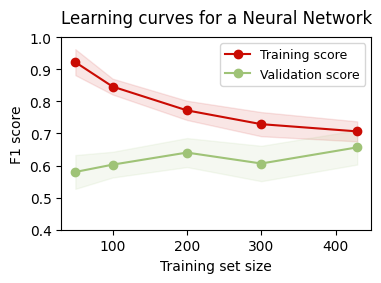

In [356]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [950]:
history = estimator_pca_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

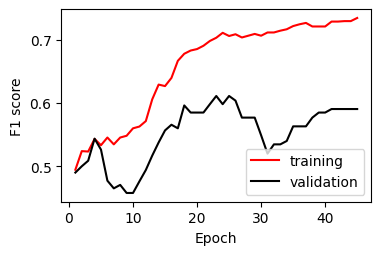

In [360]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,46))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

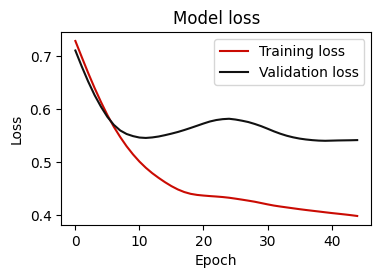

In [361]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [363]:
start = time.time()
estimator_pca_final.fit(X_pca2,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.422148s


In [367]:
X_pca2.shape

(537, 5)

In [369]:
X_test_pca.shape

(231, 5)

In [370]:
start = time.time()
y_pred_nn=estimator_pca_final.predict(X_test_pca)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.071595s


Text(-4.277777777777779, 0.5, 'True label')

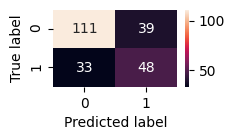

In [371]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred_nn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [373]:
precision_scorer(estimator_pca_final, X_test_pca,y_test)

0.5517241379310345

In [374]:
recall_scorer(estimator_pca_final, X_test_pca,y_test)

0.5925925925925926

In [375]:
f1_scorer(estimator_pca_final, X_test_pca,y_test)

0.5714285714285714

In [376]:
accuracy_scorer(estimator_pca_final, X_test_pca,y_test)

0.6883116883116883

In [377]:
roc_auc_scorer(estimator_pca_final, X_test_pca,y_test)

0.757119341563786

In [ ]:
# ICA Analysis

In [196]:
from sklearn.decomposition import FastICA

In [197]:
ica= FastICA(n_components=8, random_state=1)

In [198]:
X_transformed = ica.fit_transform(X_train)

In [199]:
X_transformed.shape

(537, 8)

In [200]:
from scipy.stats import kurtosis

In [201]:
np.mean(np.apply_along_axis(kurtosis, 0, X_transformed))

4.994634852760791

In [202]:
def kurtosis_calc(components):
    lst=[]
    for i in range(1,components+1):
        ica= FastICA(n_components=i, random_state=1)
        X_transformed = ica.fit_transform(X_train)
        lst.append(np.mean(np.abs(np.apply_along_axis(kurtosis, 0, X_transformed))))
    return lst

In [203]:
kurtosis_calc(8)

[0.20120697571419877,
 1.4533932928941582,
 3.411587307199321,
 3.9490348767399137,
 3.4867103291249633,
 4.46748614843948,
 4.852232806890305,
 4.994634852760791]

In [204]:
mean_kurtosis=kurtosis_calc(8)

In [205]:
n_components=list(range(1,9))

Text(0, 0.5, 'Mean kurtosis')

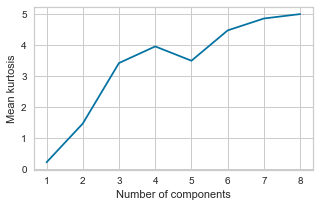

In [206]:
plt.figure(figsize=(5,3))
plt.plot(n_components,mean_kurtosis)
plt.xlabel('Number of components')
plt.ylabel('Mean kurtosis')

In [1051]:
ica2= FastICA(n_components=6, random_state=1)
X_transformed2 = ica2.fit_transform(X_train)

In [1052]:
X_transformed2.shape

(537, 6)

In [1053]:
X_test_transformed2 = ica2.fit_transform(X_test)

In [1054]:
X_test.shape

(231, 8)

In [1055]:
X_test_transformed2.shape

(231, 6)

In [209]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_ica_results = tsne.fit_transform(X_transformed2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 8.050327062606812 seconds


In [210]:
df_ica2= np.concatenate((tsne_ica_results, reshape_y_train), axis=1)
df_ica2 = pd.DataFrame(df_ica2, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

<AxesSubplot:xlabel='tsne_ica1', ylabel='tsne_ica2'>

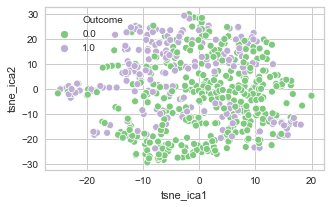

In [211]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='Accent',
    data=df_ica2
)

In [ ]:
# running clustering on ICA data

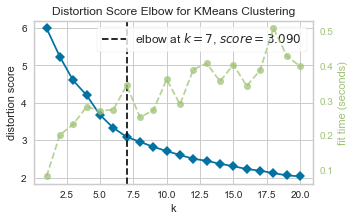

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [212]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_transformed2)        
visualizer.show()  

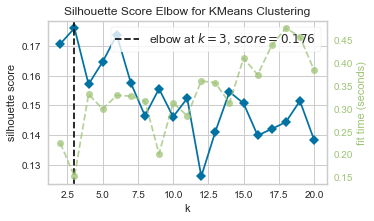

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [213]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_transformed2)        
visualizer.show() 

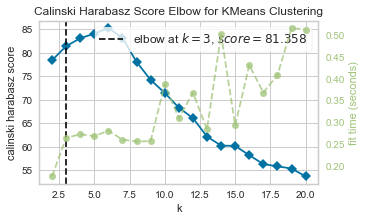

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [214]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_transformed2)        
visualizer.show() 

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

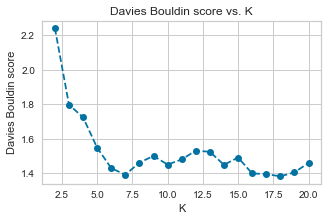

In [215]:
centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_transformed2, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

In [216]:
model_ica_c3=KMeans(n_clusters=3)
model_ica_c3.fit(X_transformed2)
label_x_train_ica3=model_ica_c3.predict(X_transformed2)

In [217]:
metrics.homogeneity_score(y_train,label_x_train_ica3)

0.14462811142769336

In [218]:
metrics.completeness_score(y_train,label_x_train_ica3)

0.12092308749925418

In [219]:
metrics.fowlkes_mallows_score(y_train,label_x_train_ica3)

0.6448285019472786

In [220]:
metrics.v_measure_score(y_train,label_x_train_ica3)

0.1317175583743758

In [221]:
metrics.adjusted_rand_score(y_train,label_x_train_ica3)

0.2331550100712625

In [222]:
metrics.adjusted_mutual_info_score(y_train,label_x_train_ica3)

0.12940132380730238

In [223]:
label_x_train_ica3= label_x_train_ica3.reshape(537,1)
ica3_X1= np.concatenate((X_transformed2, label_x_train_ica3), axis=1)
ica3_X1 = pd.DataFrame(ica3_X1, columns = ['ica1', 'ica2', 'ica3', 'ica4', 'ica5',
       'ica6', 'Outcome'])

In [224]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_ica_results = tsne.fit_transform(X_transformed2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 8.592808961868286 seconds


In [225]:
df_ica3= np.concatenate((tsne_ica_results, label_x_train_ica3), axis=1)
df_ica3 = pd.DataFrame(df_ica3, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

<AxesSubplot:xlabel='tsne_ica1', ylabel='tsne_ica2'>

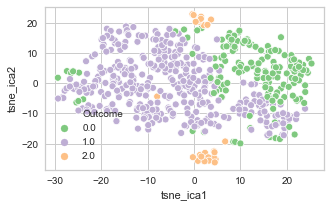

In [226]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='Accent',
    data=df_ica3 
)

In [ ]:
# running EM on ICA data

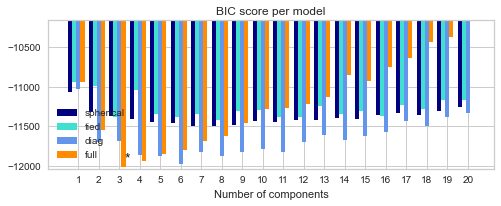

In [227]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_transformed2)
        bic.append(gmm.bic(X_transformed2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



In [228]:
gmm_ica3=mixture.GaussianMixture(n_components=3, covariance_type='full')
label_gmm_ica3 = gmm_ica3.fit_predict(X_transformed2)

In [229]:
metrics.homogeneity_score(y_train,label_gmm_ica3)

0.09473039520787327

In [230]:
metrics.completeness_score(y_train,label_gmm_ica3)

0.05817723251639931

In [231]:
metrics.fowlkes_mallows_score(y_train,label_gmm_ica3)

0.48122569608331695

In [232]:
metrics.v_measure_score(y_train,label_gmm_ica3)

0.0720847260584895

In [233]:
metrics.adjusted_rand_score(y_train,label_gmm_ica3)

0.06371976497765054

In [234]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_ica3)

0.0700361752454903

In [235]:
label_gmm_ica3 = label_gmm_ica3.reshape(537,1)

In [236]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_ica3_results = tsne.fit_transform(X_transformed2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 3.578803300857544 seconds


In [237]:
df_ica2= np.concatenate((tsne_ica3_results, label_gmm_ica3), axis=1)
df_ica2 = pd.DataFrame(df_ica2, columns = ['tsne_ica1', 'tsne_ica2', 'Outcome'])

Text(0.5, 1.0, 'EM')

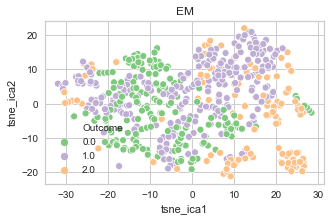

In [238]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_ica1", y="tsne_ica2",
    hue="Outcome",
    palette='Accent',
    data=df_ica2
)
plt.title('EM')

In [239]:
a = np.array([[1,2,3],[4,5,6]])
ap = np.linalg.pinv(a)


In [240]:
np.dot(ap, a)

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

In [ ]:
# nn network using fastICA

In [1008]:
X_train2, X_val, y_train2,y_val = train_test_split(
    X_transformed2, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [1009]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [1010]:
def model_nn3():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)
    model = Sequential()
    model.add(Dense(6, input_dim=6))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [1011]:
X_train2.shape, y_train2.shape, X_val.shape ,y_val.shape

((375, 6), (375,), (162, 6), (162,))

In [1012]:
batch_size=len(X_train)
estimator7 = KerasClassifier(build_fn=model_nn3, epochs=200, verbose=0, batch_size=batch_size )
history = estimator7.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

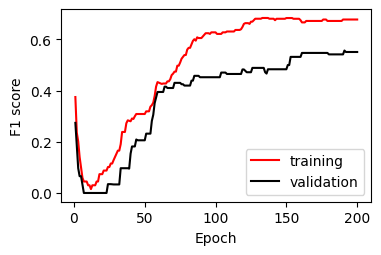

In [422]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

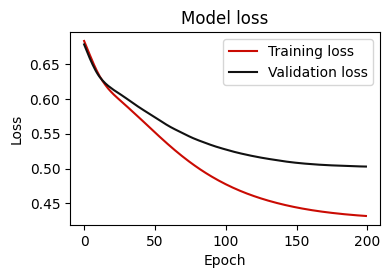

In [423]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [1013]:
def model_nn4(hidden_layers=1, learning_rate=0.01, width=6):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=6))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [957]:
estimator4 = KerasClassifier(build_fn=model_nn4, epochs=160,  verbose=0, batch_size=len(X_transformed2))
train_score, val_score = validation_curve(estimator4, X_transformed2, y_train,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=0)

Text(0, 0.5, 'F1 score')

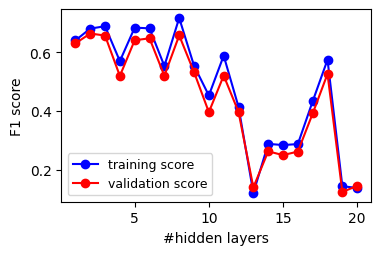

In [426]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [ ]:
#chose 2 hidden layers

In [427]:
# checking for learning rate
estimator2 = KerasClassifier(build_fn=model_nn4, epochs=160,  verbose=0, batch_size=len(X_transformed2),hidden_layers=2)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, X_transformed2, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=0)

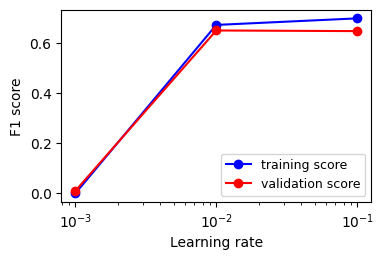

In [428]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [430]:
estimator3 = KerasClassifier(build_fn=model_nn4, epochs=160,  verbose=0, batch_size=len(X_transformed2), hidden_layers=2, learning_rate=0.01)
widths = [2, 6,12,24, 60]
train_score_w, val_score_w = validation_curve(estimator2, X_transformed2, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=0)


Text(0, 0.5, 'score')

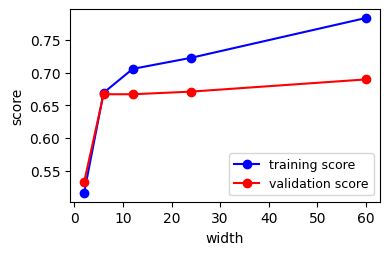

In [431]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [ ]:
# checking performance of the final model

In [1014]:
estimator_ica_final = KerasClassifier(build_fn=model_nn4, epochs=160,  verbose=0, hidden_layers=2, width=6, learning_rate=0.01,batch_size=len(X_transformed2))

In [1015]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_ica_final, X_transformed2, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [1016]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.731112
100    0.739399
200    0.706629
300    0.692246
429    0.667080
dtype: float64

 --------------------
Mean validation scores

 50     0.665257
100    0.670276
200    0.653422
300    0.639952
429    0.657423
dtype: float64

 --------------------
Std training scores

 50     0.078761
100    0.047455
200    0.053261
300    0.022069
429    0.017886
dtype: float64

 --------------------
Std validation scores

 50     0.067670
100    0.037804
200    0.045968
300    0.047643
429    0.042984
dtype: float64


(0.0, 1.0)

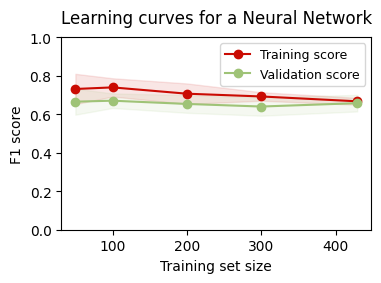

In [1017]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0,1)

In [1018]:
history = estimator_ica_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

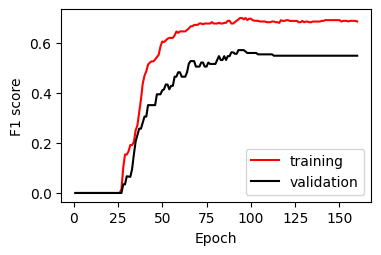

In [1019]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,161))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

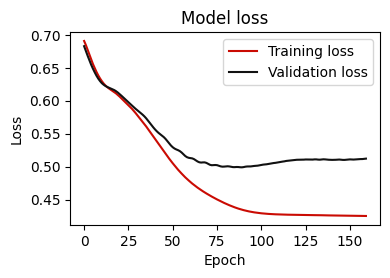

In [1020]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [1021]:
start = time.time()
estimator_ica_final.fit(X_transformed2,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.522654s


In [1022]:
start = time.time()
y_pred_nn=estimator_ica_final.predict(X_test_transformed2)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.068341s


Text(-4.277777777777779, 0.5, 'True label')

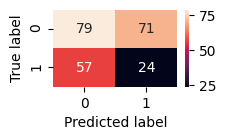

In [1023]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred_nn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [1024]:
precision_scorer(estimator_ica_final, X_test_transformed2,y_test)

0.25263157894736843

In [1025]:
recall_scorer(estimator_ica_final, X_test_transformed2,y_test)

0.2962962962962963

In [1026]:
f1_scorer(estimator_ica_final, X_test_transformed2,y_test)

0.27272727272727276

In [1027]:
accuracy_scorer(estimator_ica_final, X_test_transformed2,y_test)

0.4458874458874459

In [1028]:
roc_auc_scorer(estimator_ica_final, X_test_transformed2,y_test)

0.34378600823045263

In [ ]:
# Randomized Projection/ Random Component Analysis

In [241]:
from sklearn.random_projection import GaussianRandomProjection

In [242]:
rp = GaussianRandomProjection(n_components=4, eps=0.1, random_state=1)

In [243]:
X_rp = rp.fit_transform(X_train)

In [244]:
X_rp.shape

(537, 4)

In [245]:
from sklearn.metrics import mean_squared_error

In [246]:
inverse_data = np.linalg.pinv((rp).components_.T)
reconstructed_data = X_rp.dot(inverse_data)

In [247]:
error = np.mean((reconstructed_data - X_train)**2)

In [248]:
error

0.558945886980797

In [249]:
# ran the following reconstruction_error_calc with multiple random states (such as 1, 50, 100, 150, 200) -- please change the random state 5 times and run the function followed by mean_sq_error5, then mean_sq_error4 until mean_sq_error

In [261]:
def reconstruction_error_calc(components):
    lst=[]
    for i in range(1,components+1):
        rp = GaussianRandomProjection(n_components=i, eps=0.1, random_state=1)
        X_rp = rp.fit_transform(X_train)
        inverse_data = np.linalg.pinv((rp).components_.T)
        reconstructed_data = X_rp.dot(inverse_data)
        #print(reconstructed_data)
        error = np.mean((reconstructed_data - X_train)**2)
        #print(error)
        #mse=mean_squared_error(X_train,reconstructed_data)
        #print('*', mse)
        lst.append(error)
    return lst

In [251]:
mean_sq_error5=reconstruction_error_calc(8)

In [252]:
mean_sq_error5

[0.883772278775003,
 0.7088342965504861,
 0.5763896635177537,
 0.4790941826720495,
 0.3507100159272764,
 0.26511965514492253,
 0.06933722144743892,
 3.974888382793135e-30]

In [254]:
mean_sq_error4=reconstruction_error_calc(8)

In [255]:
mean_sq_error4

[0.8264844001397301,
 0.687201552057559,
 0.5986203561587097,
 0.4624625070475498,
 0.342032324795021,
 0.2331149038898167,
 0.14770332126323268,
 9.218613775209587e-30]

In [256]:
mean_sq_error3=reconstruction_error_calc(8)

In [257]:
mean_sq_error3

[0.8264844001397301,
 0.687201552057559,
 0.5986203561587097,
 0.4624625070475498,
 0.342032324795021,
 0.2331149038898167,
 0.14770332126323268,
 9.218613775209587e-30]

In [259]:
mean_sq_error2=reconstruction_error_calc(8)

In [260]:
mean_sq_error2

[0.8909191434091056,
 0.8014853245165473,
 0.6350487852377533,
 0.468369362003178,
 0.3381401355200559,
 0.20081243875404567,
 0.07014820323141405,
 1.4039430561189178e-28]

In [262]:
mean_sq_error=reconstruction_error_calc(8)

In [263]:
mean_sq_error

[0.8783267928044487,
 0.7816341201618573,
 0.663515509976923,
 0.558945886980797,
 0.41120859386685005,
 0.2826116124801136,
 0.17545837886176802,
 7.545883010458345e-30]

In [264]:
n_components=list(range(1,9))

Text(0, 0.5, 'Mean Squared error')

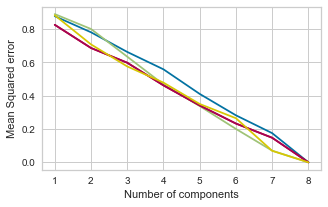

In [265]:
plt.figure(figsize=(5,3))
plt.plot(n_components,mean_sq_error)
plt.plot(n_components,mean_sq_error2)
plt.plot(n_components,mean_sq_error3)
plt.plot(n_components,mean_sq_error4)
plt.plot(n_components,mean_sq_error5)
plt.xlabel('Number of components')
plt.ylabel('Mean Squared error')

In [266]:
err=[(a+b+c+d+e)/2 for a,b,c,d,e in zip(mean_sq_error,mean_sq_error2,mean_sq_error3,mean_sq_error4,mean_sq_error5)]

Text(0, 0.5, 'Mean Squared error')

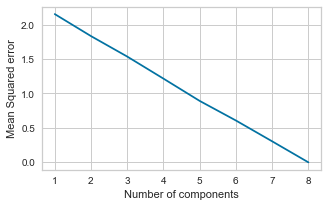

In [267]:
plt.figure(figsize=(5,3))
plt.plot(n_components,err)
plt.xlabel('Number of components')
plt.ylabel('Mean Squared error')

In [268]:
rp = GaussianRandomProjection(n_components=8, eps=0.1, random_state=200)
X_transformed_rp2 = rp.fit_transform(X_train)

In [452]:
X_transformed_test_rp2 = rp.transform(X_test)

In [269]:
X_transformed_rp2.shape

(537, 8)

In [274]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_rp_results = tsne.fit_transform(X_transformed_rp2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 4.9600701332092285 seconds


In [275]:
df_rp1 = np.concatenate((tsne_rp_results, reshape_y_train), axis=1)
df_rp1 = pd.DataFrame(df_rp1, columns = ['tsne_rp1', 'tsne_rp2', 'Outcome'])

<AxesSubplot:xlabel='tsne_rp1', ylabel='tsne_rp2'>

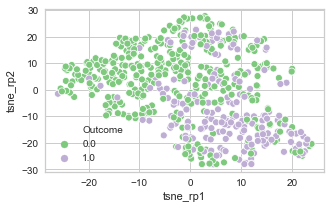

In [276]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_rp1", y="tsne_rp2",
    hue="Outcome",
    palette='Accent',
    data=df_rp1
)

In [ ]:
# running clustering algorithms on RP data

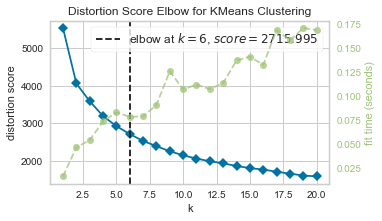

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [277]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_transformed_rp2)        
visualizer.show()  

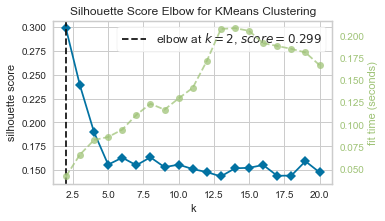

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [278]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(X_transformed_rp2)        
visualizer.show() 

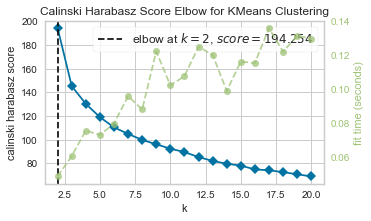

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [279]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(X_transformed_rp2)        
visualizer.show() 

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

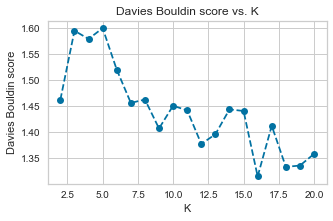

In [280]:
centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(X_transformed_rp2, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

In [281]:
model_rp_kmeans = KMeans(n_clusters=2)
model_rp_kmeans.fit(X_transformed_rp2)
label_x_rp2 = model_rp_kmeans.predict(X_transformed_rp2)

In [282]:
metrics.homogeneity_score(y_train,label_x_rp2)

0.13215726229630137

In [283]:
metrics.completeness_score(y_train,label_x_rp2)

0.14254534313815007

In [284]:
metrics.fowlkes_mallows_score(y_train,label_x_rp2)

0.6651479910326342

In [285]:
metrics.v_measure_score(y_train,label_x_rp2)

0.13715488626277286

In [286]:
metrics.adjusted_rand_score(y_train,label_x_rp2)

0.2258184374252256

In [287]:
metrics.adjusted_mutual_info_score(y_train,label_x_rp2)

0.1358576069256481

In [288]:
label_x_rp2 = label_x_rp2.reshape(537,1)

In [289]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_rp_results = tsne.fit_transform(X_transformed_rp2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 2.5473740100860596 seconds


In [290]:
df_rp2= np.concatenate((tsne_rp_results, label_x_rp2), axis=1)
df_rp2 = pd.DataFrame(df_rp2, columns = ['tsne_rp1', 'tsne_rp2', 'Outcome'])

<AxesSubplot:xlabel='tsne_rp1', ylabel='tsne_rp2'>

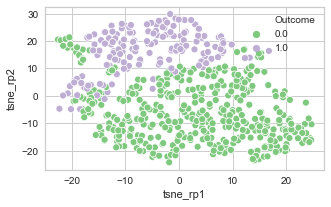

In [291]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_rp1", y="tsne_rp2",
    hue="Outcome",
    palette='Accent',
    data=df_rp2)

In [ ]:
# running EM on RP data

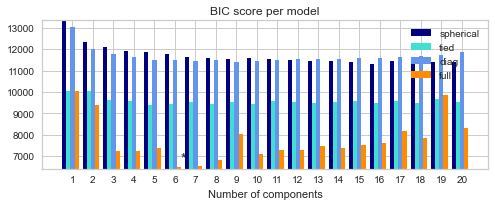

In [296]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_transformed_rp2)
        bic.append(gmm.bic(X_transformed_rp2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [297]:
gmm_rp=mixture.GaussianMixture(n_components=6, covariance_type='full')
label_gmm_rp = gmm_rp.fit_predict(X_transformed_rp2)

In [298]:
metrics.homogeneity_score(y_train,label_gmm_rp)

0.13053388001240182

In [299]:
metrics.completeness_score(y_train,label_gmm_rp)

0.053618323464727904

In [300]:
metrics.fowlkes_mallows_score(y_train,label_gmm_rp)

0.41147583014172295

In [301]:
metrics.v_measure_score(y_train,label_gmm_rp)

0.07601329410625449

In [302]:
metrics.adjusted_rand_score(y_train,label_gmm_rp)

0.06786717688968856

In [303]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_rp)

0.0720735874180593

In [304]:
label_gmm_rp = label_gmm_rp.reshape(537,1)

In [305]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_rp_gmm_results = tsne.fit_transform(X_transformed_rp2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 3.0537731647491455 seconds


In [306]:
df_rp2= np.concatenate((tsne_rp_gmm_results, label_gmm_rp), axis=1)
df_rp2 = pd.DataFrame(df_rp2, columns = ['tsne_rp1', 'tsne_rp2', 'Outcome'])

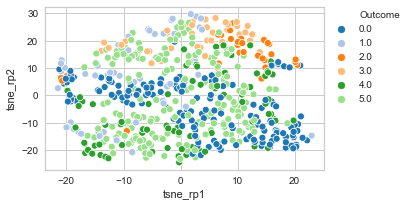

In [310]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_rp1", y="tsne_rp2",
    hue="Outcome",
    palette='tab20',
    data=df_rp2
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# Neural Network for RP

In [1029]:
X_train2, X_val, y_train2, y_val = train_test_split(
    X_transformed_rp2, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [1030]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [1031]:
X_transformed_rp2.shape

(537, 8)

In [1032]:
def model_nn5():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(8, input_dim=8))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [1033]:
batch_size=len(X_train)
estimator10 = KerasClassifier(build_fn=model_nn5, epochs=200, verbose=0, batch_size=batch_size )
history = estimator10.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

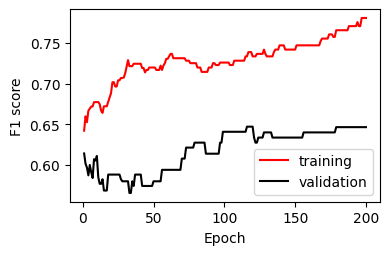

In [459]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

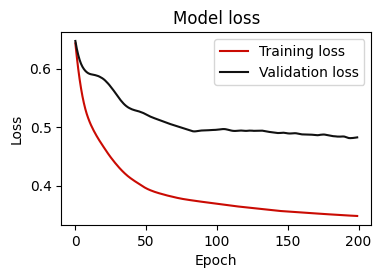

In [460]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [1034]:
def model_nn6(hidden_layers=1, learning_rate=0.01, width=8):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=8))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [462]:
estimator1 = KerasClassifier(build_fn=model_nn6, epochs=100,  verbose=0, batch_size=len(X_transformed_rp2))
train_score, val_score = validation_curve(estimator1, X_transformed_rp2, y_train,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=0)

Text(0, 0.5, 'F1 score')

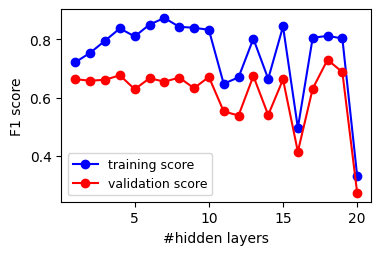

In [463]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [464]:
# checking for learning rate
estimator2 = KerasClassifier(build_fn=model_nn6, epochs=100,  verbose=0, batch_size=len(X_transformed_rp2),hidden_layers=1)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, X_transformed_rp2, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=0)

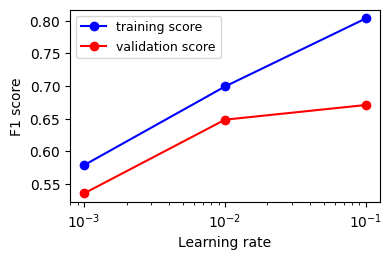

In [465]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [470]:
estimator3 = KerasClassifier(build_fn=model_nn6, epochs=100,  verbose=0, batch_size=len(X_transformed_rp2),hidden_layers=1, learning_rate=0.01)
widths = [2, 8,16, 24, 32]
train_score_w, val_score_w = validation_curve(estimator3, X_transformed_rp2, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=0)


Text(0, 0.5, 'score')

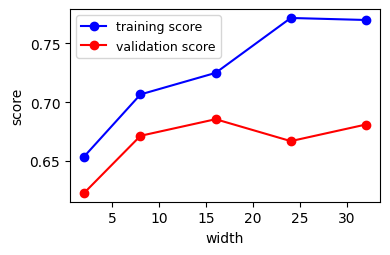

In [471]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [ ]:
# checking performance of the final model

In [1035]:
estimator_rp_final = KerasClassifier(build_fn=model_nn6,epochs=100,  verbose=0, batch_size=len(X_transformed_rp2),hidden_layers=1, learning_rate=0.01, width= 16)

In [1036]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_rp_final, X_transformed_rp2, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [1037]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.936317
100    0.885459
200    0.809697
300    0.776078
429    0.742426
dtype: float64

 --------------------
Mean validation scores

 50     0.599058
100    0.647694
200    0.659518
300    0.685444
429    0.669768
dtype: float64

 --------------------
Std training scores

 50     0.059359
100    0.016834
200    0.006835
300    0.013976
429    0.029012
dtype: float64

 --------------------
Std validation scores

 50     0.086804
100    0.053203
200    0.084836
300    0.072788
429    0.046664
dtype: float64


(0.4, 1.0)

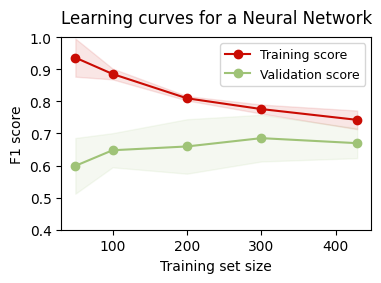

In [1038]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [1039]:
history = estimator_rp_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

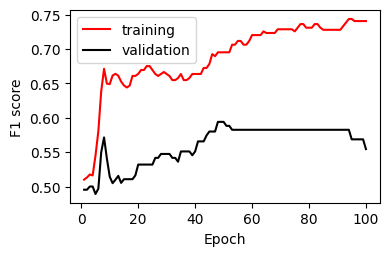

In [1040]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,101))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

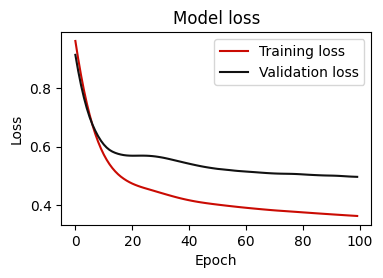

In [1041]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [1042]:
start = time.time()
estimator_rp_final.fit(X_transformed_rp2,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.491666s


In [1043]:
start = time.time()
y_pred_nn=estimator_rp_final.predict(X_transformed_test_rp2)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.070116s


Text(-4.277777777777779, 0.5, 'True label')

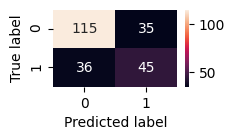

In [1044]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred_nn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [1045]:
precision_scorer(estimator_rp_final, X_transformed_test_rp2,y_test)

0.5625

In [1046]:
recall_scorer(estimator_rp_final, X_transformed_test_rp2,y_test)

0.5555555555555556

In [1047]:
f1_scorer(estimator_rp_final, X_transformed_test_rp2,y_test)

0.5590062111801242

In [1048]:
accuracy_scorer(estimator_rp_final, X_transformed_test_rp2,y_test)

0.6926406926406926

In [1049]:
roc_auc_scorer(estimator_rp_final, X_transformed_test_rp2,y_test)

0.7737448559670782

In [ ]:
#4th algo -  feature selection by Decsion Trees 

In [491]:
dt4 = DecisionTreeClassifier(random_state=21, ccp_alpha=0.01)

In [492]:
dt4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=21)

In [493]:
importances = dt4.feature_importances_
indices = np.argsort(importances)

In [494]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

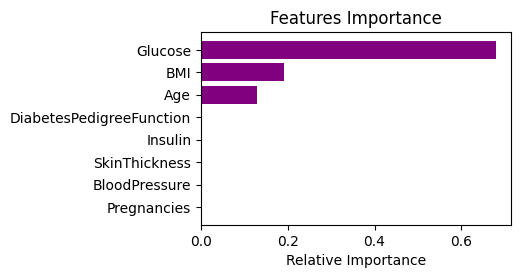

In [496]:
plt.figure(figsize=(4,2.5))
features = cols
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [497]:
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.68047
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.19053
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.12899


In [498]:
data_new_dt=data_new[['Glucose','BMI','Age','Outcome']]

In [499]:
data_X_dt2=data_new[['Glucose','BMI','Age']].values

In [500]:
data_X_dt2

array([[ 0.81753598,  0.90226288,  2.86954223],
       [-0.40168059,  0.51377815,  0.84774799],
       [-0.40168059, -1.08498593, -0.83708055],
       ...,
       [ 0.38916259, -0.81603496,  0.258058  ],
       [-0.69824678, -0.12871583, -0.41587341],
       [ 1.87199355,  1.11144696,  0.67926514]])

In [501]:
data_y_dt2=data_new[['Outcome']].values

In [509]:
test_X_dt2=data_test_new[['Glucose','BMI','Age']].values

In [510]:
test_y_dt2=data_test_new[['Outcome']].values

In [999]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000,random_state=1)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 2.4629781246185303 seconds


In [1004]:
df_dt1 = np.concatenate((tsne_dt_results,data_y_dt2), axis=1)
df_dt1 = pd.DataFrame(df_dt1, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

<AxesSubplot:xlabel='tsne_dt1', ylabel='tsne_dt2'>

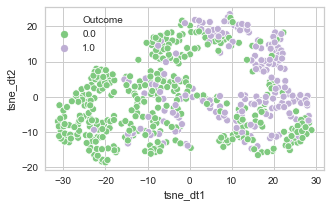

In [1005]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt1
)

In [1006]:
df_dt1 = np.concatenate((tsne_dt_results, reshape_y_train), axis=1)
df_dt1 = pd.DataFrame(df_dt1, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

<AxesSubplot:xlabel='tsne_dt1', ylabel='tsne_dt2'>

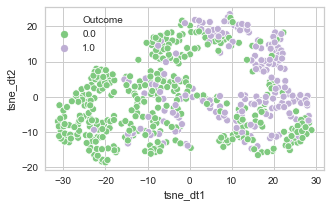

In [1007]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt1
)

In [ ]:
# running clustering on decision trees data

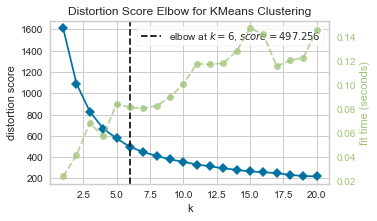

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [967]:
plt.figure(figsize=(5,3))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(data_X_dt2)        
visualizer.show()  

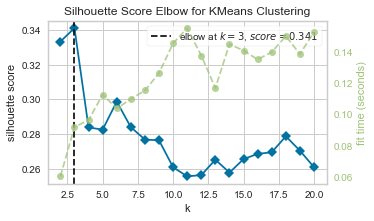

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [968]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='silhouette', timings=True)
visualizer.fit(data_X_dt2)        
visualizer.show() 

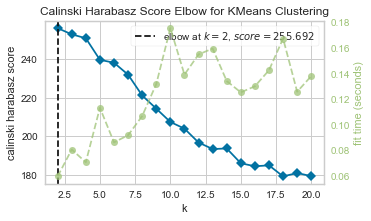

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [969]:
plt.figure(figsize=(5,3))
visualizer = KElbowVisualizer(model, k=(2,21), metric='calinski_harabasz', timings=True)
visualizer.fit(data_X_dt2)        
visualizer.show() 

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

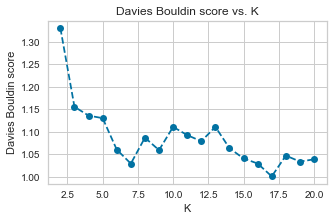

In [970]:
centers = list(range(2,21))
scores= []
for center in centers:
    scores.append(get_kmeans_score(data_X_dt2, center))

plt.figure(figsize=(5,3))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')

In [971]:
model4=KMeans(n_clusters=2)
model4.fit(data_X_dt2)
label_dt=model4.predict(data_X_dt2)

In [972]:
metrics.homogeneity_score(y_train,label_dt)

0.20878884429419858

In [973]:
metrics.completeness_score(y_train,label_dt)

0.20190283806879156

In [974]:
metrics.fowlkes_mallows_score(y_train,label_dt)

0.67100688168881

In [975]:
metrics.v_measure_score(y_train,label_dt)

0.20528811286147708

In [976]:
metrics.adjusted_rand_score(y_train,label_dt)

0.29337011490603093

In [977]:
metrics.adjusted_mutual_info_score(y_train,label_dt)

0.20415703359750653

In [978]:
label_dt= label_dt.reshape(537,1)

In [1008]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 3.4154398441314697 seconds


In [1009]:
df_dt2= np.concatenate((tsne_dt_results, label_dt), axis=1)
df_dt2 = pd.DataFrame(df_dt2, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

<AxesSubplot:xlabel='tsne_dt1', ylabel='tsne_dt2'>

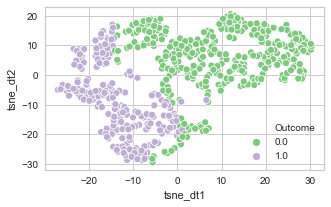

In [1010]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt2
)


In [ ]:
# running EM on decision tree data

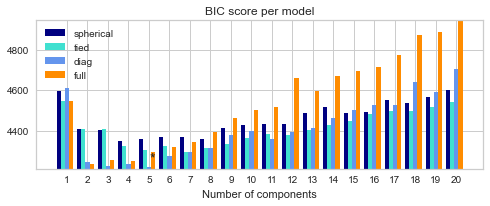

In [985]:
# code from scikit library https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1,21)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(data_X_dt2)
        bic.append(gmm.bic(data_X_dt2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

#print(best_gmm.covariance_type, best_gmm.covariances_)

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


In [931]:
gmm_dt=mixture.GaussianMixture(n_components=5, covariance_type='diag')
label_gmm_dt = gmm_dt.fit_predict(data_X_dt2)

In [987]:
metrics.homogeneity_score(y_train,label_gmm_dt)

0.21926161957147255

In [988]:
metrics.completeness_score(y_train,label_gmm_dt)

0.0935232886580277

In [989]:
metrics.fowlkes_mallows_score(y_train,label_gmm_dt)

0.44133619215884534

In [990]:
metrics.v_measure_score(y_train,label_gmm_dt)

0.13111929123999505

In [991]:
metrics.adjusted_rand_score(y_train,label_gmm_dt)

0.11561510786772981

In [992]:
metrics.adjusted_mutual_info_score(y_train,label_gmm_dt)

0.1280898143486992

In [932]:
label_gmm_dt= label_gmm_dt.reshape(537,1)

In [994]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 3.1848409175872803 seconds


In [995]:
df_dt2= np.concatenate((tsne_dt_results, label_gmm_dt), axis=1)
df_dt2 = pd.DataFrame(df_dt2, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

<AxesSubplot:xlabel='tsne_dt1', ylabel='tsne_dt2'>

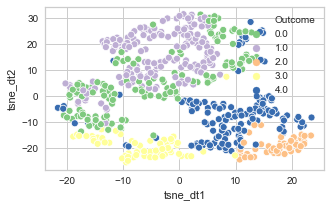

In [996]:
plt.figure(figsize=(5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt2
)


In [928]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_dt_results = tsne.fit_transform(data_X_dt2)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 3.521812915802002 seconds


In [933]:
df_dt2= np.concatenate((tsne_dt_results, label_gmm_dt), axis=1)
df_dt2 = pd.DataFrame(df_dt2, columns = ['tsne_dt1', 'tsne_dt2', 'Outcome'])

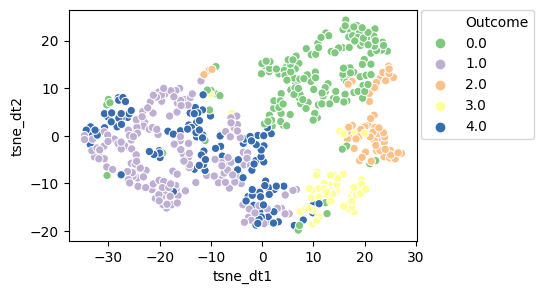

In [935]:
plt.figure(figsize=(4.5,3))
sns.scatterplot(
    x="tsne_dt1", y="tsne_dt2",
    hue="Outcome",
    palette='Accent',
    data=df_dt2
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# neural network for Decision tree feature selected dataset

In [965]:
X_train2, X_val, y_train2, y_val = train_test_split(
    data_X_dt2, data_y_dt2, test_size=0.3, random_state=8, stratify=data_y_dt2)

In [966]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [967]:
def model_nn7():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(3, input_dim=3))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [968]:
batch_size=len(X_train)
estimator6 = KerasClassifier(build_fn=model_nn7, epochs=200, verbose=0, batch_size=batch_size )
history = estimator6.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

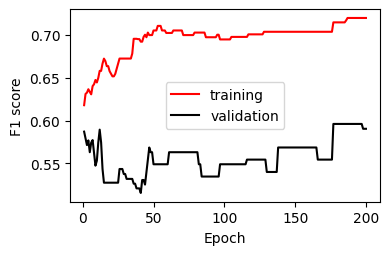

In [515]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

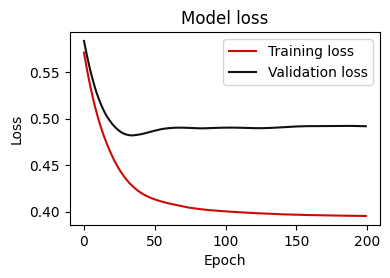

In [516]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [517]:
def model_nn8(hidden_layers=1, learning_rate=0.01, width=3):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=3))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [518]:
estimator1 = KerasClassifier(build_fn=model_nn8, epochs=12,  verbose=0, batch_size=len(data_X_dt2))
train_score, val_score = validation_curve(estimator1, data_X_dt2, data_y_dt2,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=0)

Text(0, 0.5, 'F1 score')

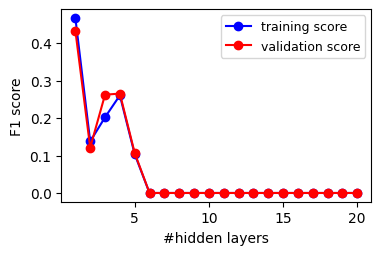

In [519]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [520]:
# checking for learning rate
estimator2 = KerasClassifier(build_fn=model_nn8, epochs=12,  verbose=0, batch_size=len(data_X_dt2),hidden_layers=1)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, data_X_dt2, data_y_dt2,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=0)

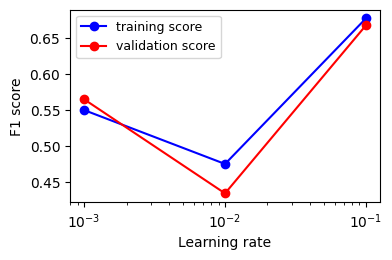

In [521]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [523]:
estimator3 = KerasClassifier(build_fn=model_nn8, epochs=12,  verbose=0, batch_size=len(data_X_dt2),hidden_layers=1, learning_rate=0.1)
widths = [3,6,9,12,15,30]
train_score_w, val_score_w = validation_curve(estimator3, data_X_dt2, data_y_dt2,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=0)


Text(0, 0.5, 'score')

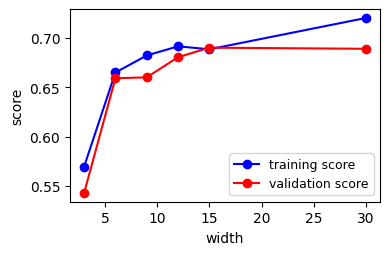

In [524]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [ ]:
# checking performance of the final model

In [525]:
estimator_dt_final = KerasClassifier(build_fn=model_nn8, epochs=12,  verbose=0, hidden_layers=1, width=15, learning_rate=0.1,batch_size=len(data_X_dt2))

In [526]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_dt_final, data_X_dt2, data_y_dt2, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [527]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.746117
100    0.736557
200    0.709995
300    0.710108
429    0.682653
dtype: float64

 --------------------
Mean validation scores

 50     0.640330
100    0.674665
200    0.661863
300    0.680646
429    0.656930
dtype: float64

 --------------------
Std training scores

 50     0.062046
100    0.017200
200    0.037707
300    0.030815
429    0.023882
dtype: float64

 --------------------
Std validation scores

 50     0.082340
100    0.070274
200    0.046693
300    0.069618
429    0.065869
dtype: float64


(0.4, 1.0)

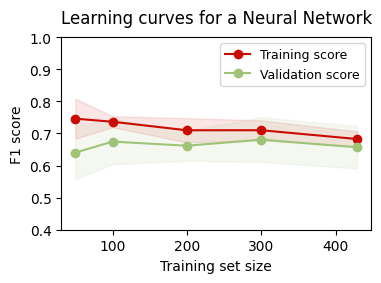

In [528]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [969]:
history = estimator_dt_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

Text(0, 0.5, 'F1 score')

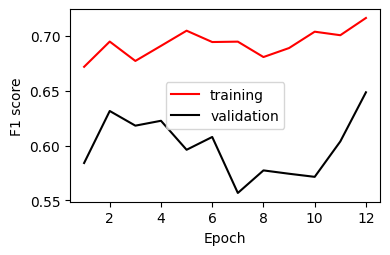

In [532]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,13))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

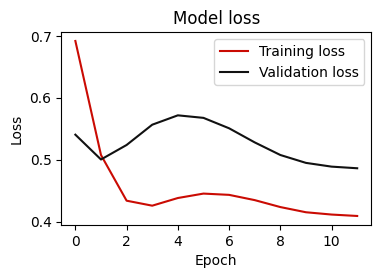

In [533]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [534]:
start = time.time()
estimator_dt_final.fit(data_X_dt2, data_y_dt2)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.338482s


In [536]:
start = time.time()
y_pred_nn=estimator_dt_final.predict(test_X_dt2)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.057714s


Text(-4.277777777777779, 0.5, 'True label')

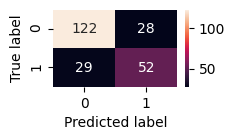

In [537]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(test_y_dt2,y_pred_nn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [538]:
precision_scorer(estimator_dt_final, test_X_dt2,test_y_dt2)

0.65

In [539]:
recall_scorer(estimator_dt_final, test_X_dt2,test_y_dt2)

0.6419753086419753

In [540]:
f1_scorer(estimator_dt_final, test_X_dt2,test_y_dt2)

0.6459627329192547

In [541]:
accuracy_scorer(estimator_dt_final, test_X_dt2,test_y_dt2)

0.7532467532467533

In [542]:
roc_auc_scorer(estimator_dt_final, test_X_dt2,test_y_dt2)

0.7780246913580247

In [ ]:
# TSNE original dataset 

In [1067]:
X_train.shape

(537, 8)

In [1068]:
y_train_reshape = y_train.reshape(537,1)

In [1065]:
ime_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
tsne_dt_results = tsne.fit_transform(X_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 81518.44666695595 seconds


In [1070]:
df_o= np.concatenate((tsne_dt_results, y_train_reshape), axis=1)
df_o = pd.DataFrame(df_o, columns = ['tsne_original1', 'tsne_original2', 'Outcome'])

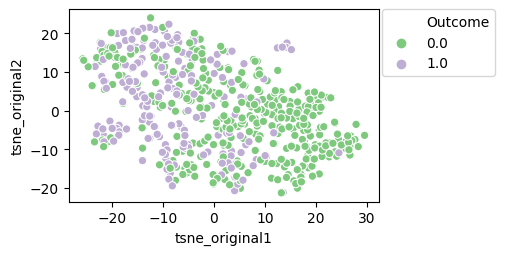

In [1073]:
plt.figure(figsize=(4,2.5))
sns.scatterplot(
    x="tsne_original1", y="tsne_original2",
    hue="Outcome",
    palette='Accent',
    data=df_o
)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)